In [ ]:
import pandas as pd

# Carregar o arquivo CSV para um DataFrame do pandas
df = pd.read_csv('dados_tratados.csv')

# Exibir as primeiras linhas do DataFrame para verificar se foi carregado corretamente
print(df.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year     

In [ ]:

# Remover a coluna 'customerID' do DataFrame
# O argumento 'axis=1' indica que estamos removendo uma coluna
# O argumento 'inplace=True' modifica o DataFrame diretamente, sem a necessidade de criar um novo
df.drop('customerID', axis=1, inplace=True)

# Exibir as 5 primeiras linhas do DataFrame para confirmar que a coluna foi removida
print("Visualização do DataFrame após a remoção da coluna 'customerID':")
print(df.head())

# (Opcional) Salvar o novo DataFrame limpo em um novo arquivo CSV
# df.to_csv('dados_sem_id.csv', index=False)

Visualização do DataFrame após a remoção da coluna 'customerID':
  Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   
3   Yes    Male              1     Yes         No      13          Yes   
4   Yes  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1           Yes             DSL             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract

In [ ]:
# Importar a biblioteca pandas
import pandas as pd

# --- PASSO 1: Carregar o arquivo original ---
# Certifique-se de que o arquivo 'dados_tratados.csv' foi carregado no seu ambiente do Colab
try:
    df = pd.read_csv('dados_tratados.csv')
    print("Arquivo 'dados_tratados.csv' carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo 'dados_tratados.csv' não encontrado.")
    print("Por favor, faça o upload do arquivo para o ambiente do Colab antes de continuar.")
    # Interrompe a execução se o arquivo não for encontrado
    raise

# --- PASSO 2: Remover a coluna de ID ---
# Removemos o identificador único que não ajuda na previsão
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("Coluna 'customerID' removida.")

# --- PASSO 3: Aplicar One-Hot Encoding ---
# A coluna 'Churn' já tem uma versão numérica ('Churn_numeric'), então vamos remover a original
if 'Churn' in df.columns:
    df_to_encode = df.drop('Churn', axis=1)
    print("Preparando para codificação...")
else:
    df_to_encode = df

# Aplicar o One-Hot Encoding para transformar variáveis categóricas em numéricas
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)

# Mover a coluna alvo ('Churn_numeric') para o final por convenção
if 'Churn_numeric' in df_encoded.columns:
    churn_column = df_encoded.pop('Churn_numeric')
    df_encoded['Churn_numeric'] = churn_column
    print("Codificação One-Hot aplicada com sucesso!")


# --- RESULTADO FINAL ---
# Exibir as dimensões e as primeiras linhas do DataFrame final
print("\n--- Resultado Final ---")
print("Dimensões do DataFrame transformado (linhas, colunas):", df_encoded.shape)
print("\nVisualização das 5 primeiras linhas do DataFrame codificado:")
print(df_encoded.head())

# (Opcional) Salvar o DataFrame final em um novo arquivo CSV
# df_encoded.to_csv('dados_finais_prontos.csv', index=False)

Arquivo 'dados_tratados.csv' carregado com sucesso!
Coluna 'customerID' removida.
Preparando para codificação...
Codificação One-Hot aplicada com sucesso!

--- Resultado Final ---
Dimensões do DataFrame transformado (linhas, colunas): (7032, 31)

Visualização das 5 primeiras linhas do DataFrame codificado:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       9            65.6        593.30        False   
1              0       9            59.9        542.40         True   
2              0       4            73.9        280.85         True   
3              1      13            98.0       1237.85         True   
4              1       3            83.9        267.40        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True            True              True   
1        False           False              True   
2        False           False              True   
3         True           False              True   
4    

Gerando Gráfico 1: Churn por Tipo de Contrato...


/tmp/ipython-input-3155913024.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=contract_churn_pct.index, y=contract_churn_pct.values, palette='coolwarm')
/tmp/ipython-input-3155913024.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Mensal', 'Um Ano', 'Dois Anos']) # Deixa os rótulos mais claros


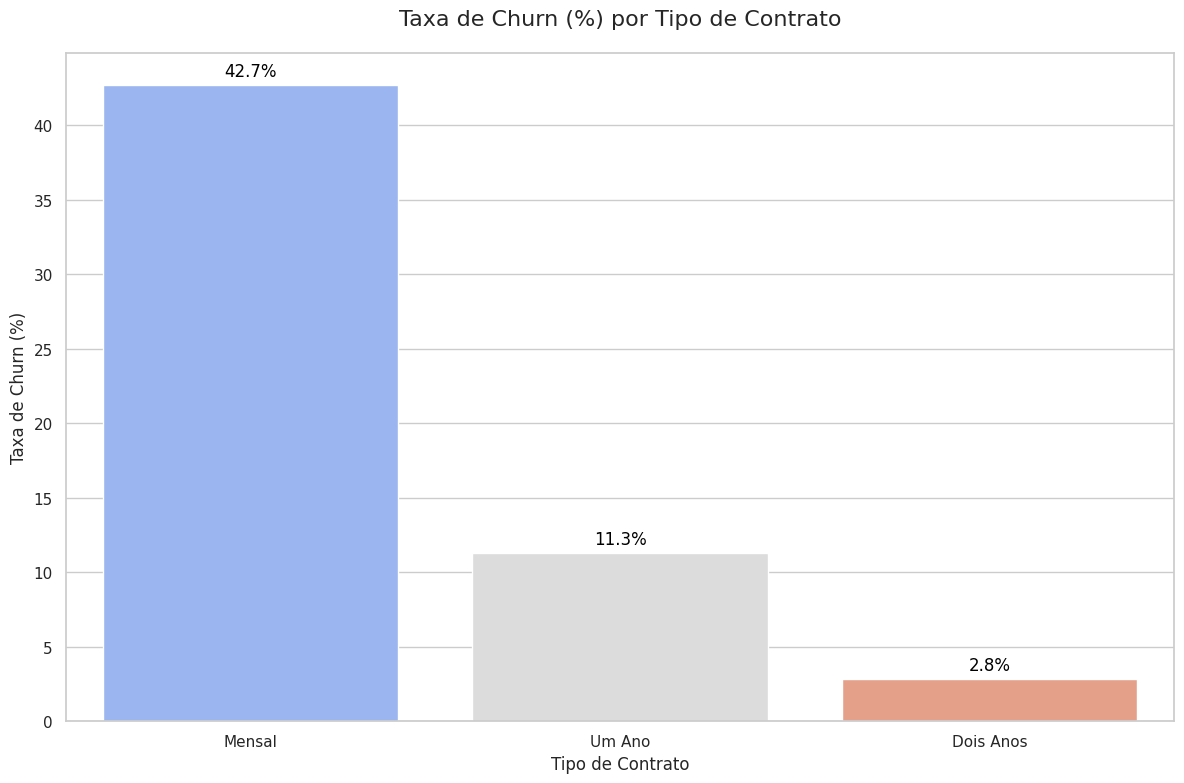

/tmp/ipython-input-3155913024.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=internet_churn_pct.index, y=internet_churn_pct.values, palette='viridis')


Gerando Gráfico 2: Churn por Serviço de Internet...


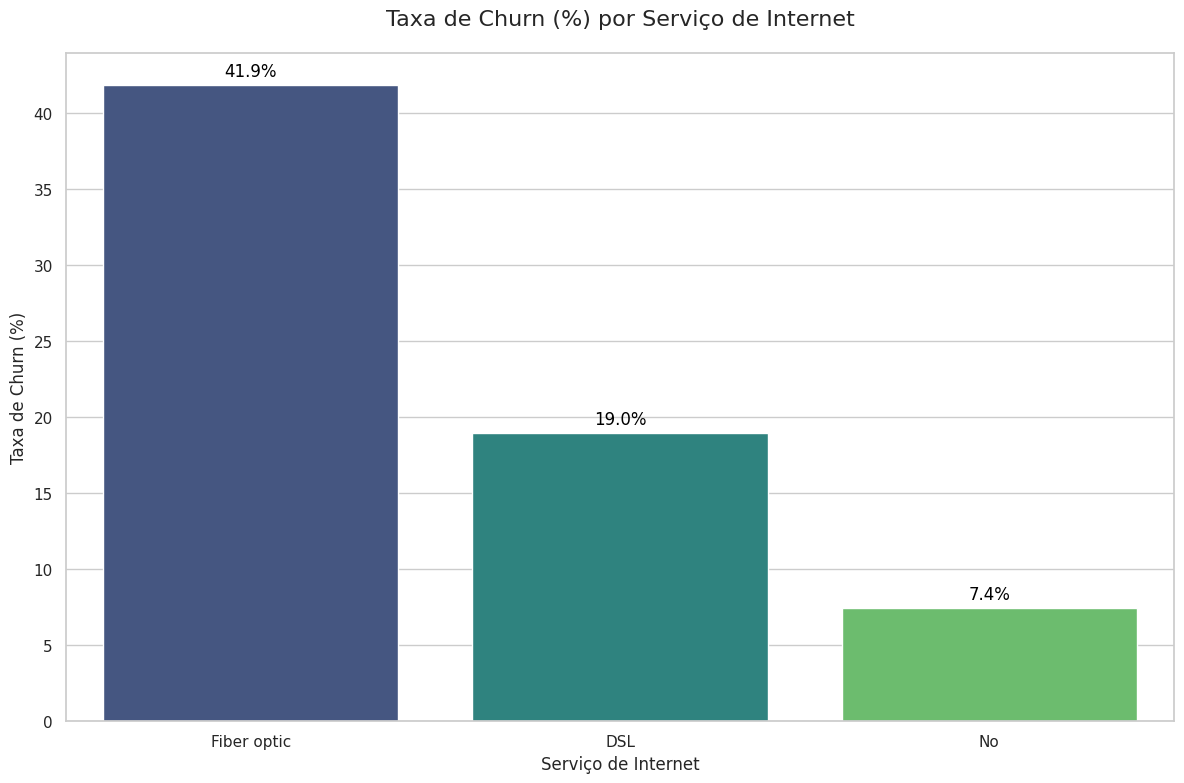

Gerando Gráfico 3: Churn por Tempo de Contrato (Tenure)...


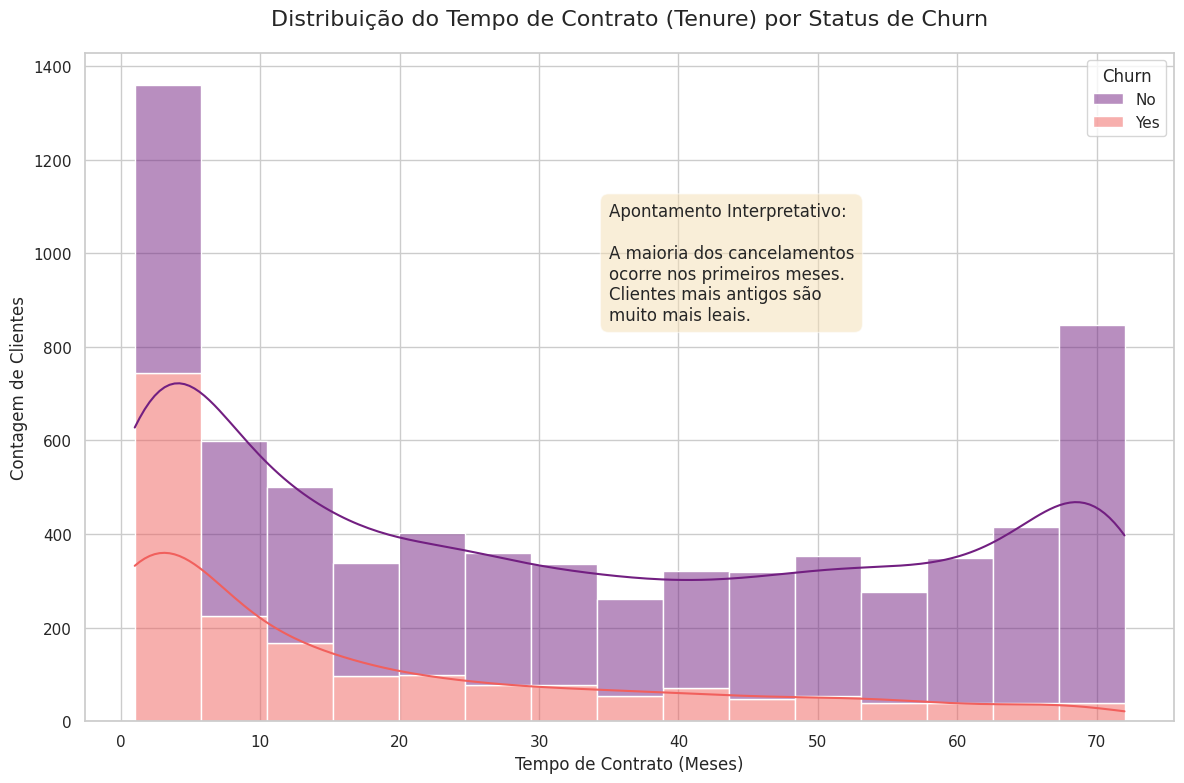

Gerando Gráfico 4: Churn por Fatura Mensal...


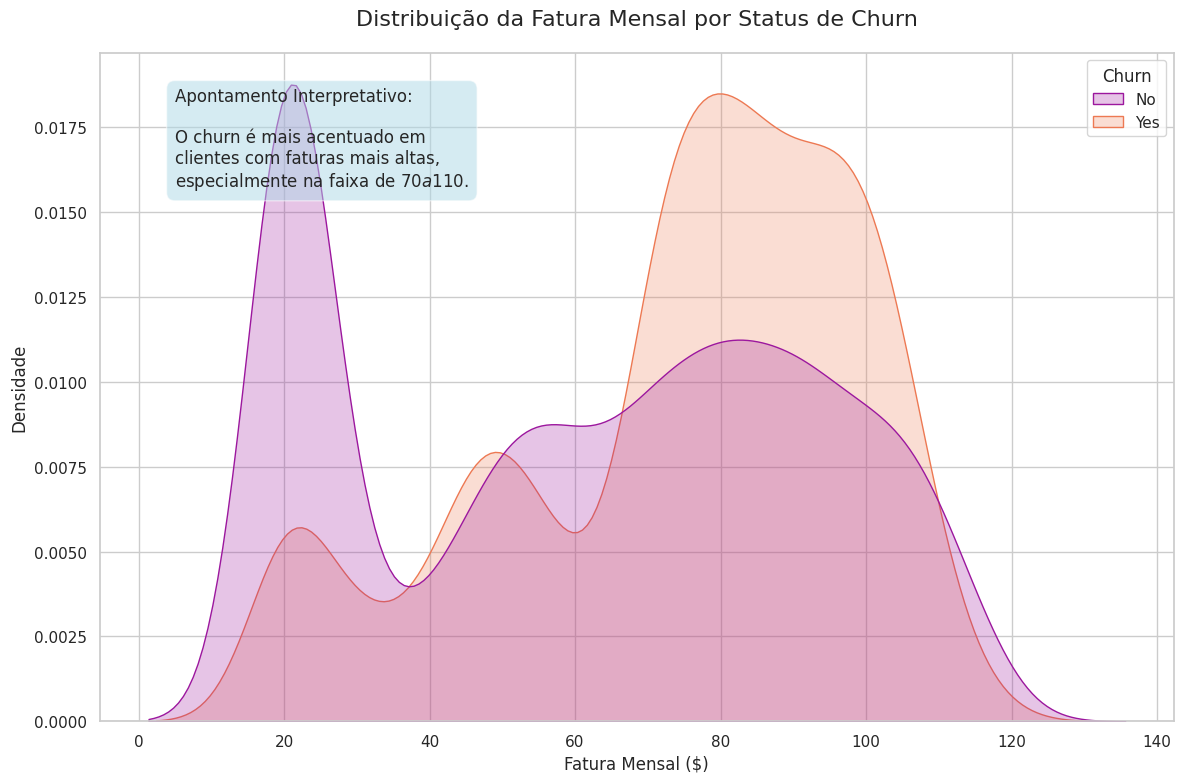

In [ ]:
# Importar bibliotecas para manipulação de dados e visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURAÇÕES GERAIS DOS GRÁFICOS ---
# Define um estilo visual mais agradável para os gráficos
sns.set(style="whitegrid")
# Define o tamanho padrão para as figuras (gráficos)
plt.rcParams['figure.figsize'] = (12, 8)
# Define o tamanho padrão da fonte
plt.rcParams['font.size'] = 12

# --- CARREGAMENTO DOS DADOS ---
# Tenta carregar o arquivo CSV. Se não encontrar, exibe uma mensagem de erro.
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("Erro: Arquivo 'dados_tratados.csv' não encontrado. Por favor, faça o upload do arquivo.")
    # Encerra o script se o arquivo não for encontrado
    exit()

# --- 1. GRÁFICO: TAXA DE CHURN POR TIPO DE CONTRATO ---
print("Gerando Gráfico 1: Churn por Tipo de Contrato...")
# Agrupa os dados por 'Contract' e calcula a porcentagem de 'Churn'
contract_churn_pct = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
contract_churn_pct = contract_churn_pct.sort_values(ascending=False)

# Cria a figura do gráfico
plt.figure()
ax1 = sns.barplot(x=contract_churn_pct.index, y=contract_churn_pct.values, palette='coolwarm')
ax1.set_title('Taxa de Churn (%) por Tipo de Contrato', fontsize=16, pad=20)
ax1.set_xlabel('Tipo de Contrato', fontsize=12)
ax1.set_ylabel('Taxa de Churn (%)', fontsize=12)
ax1.set_xticklabels(['Mensal', 'Um Ano', 'Dois Anos']) # Deixa os rótulos mais claros

# Adiciona os rótulos de porcentagem em cima de cada barra
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                   textcoords='offset points')
plt.tight_layout()
plt.show()


# --- 2. GRÁFICO: TAXA DE CHURN POR SERVIÇO DE INTERNET ---
print("Gerando Gráfico 2: Churn por Serviço de Internet...")
internet_churn_pct = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
internet_churn_pct = internet_churn_pct.sort_values(ascending=False)

plt.figure()
ax2 = sns.barplot(x=internet_churn_pct.index, y=internet_churn_pct.values, palette='viridis')
ax2.set_title('Taxa de Churn (%) por Serviço de Internet', fontsize=16, pad=20)
ax2.set_xlabel('Serviço de Internet', fontsize=12)
ax2.set_ylabel('Taxa de Churn (%)', fontsize=12)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                   textcoords='offset points')
plt.tight_layout()
plt.show()


# --- 3. GRÁFICO: DISTRIBUIÇÃO DO TEMPO DE CONTRATO (TENURE) ---
print("Gerando Gráfico 3: Churn por Tempo de Contrato (Tenure)...")
plt.figure()
ax3 = sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True, palette='magma')
ax3.set_title('Distribuição do Tempo de Contrato (Tenure) por Status de Churn', fontsize=16, pad=20)
ax3.set_xlabel('Tempo de Contrato (Meses)', fontsize=12)
ax3.set_ylabel('Contagem de Clientes', fontsize=12)

# Adiciona a caixa de texto com a interpretação no gráfico
ax3.text(x=35, y=ax3.get_ylim()[1]*0.6, s='Apontamento Interpretativo:\n\nA maioria dos cancelamentos\nocorre nos primeiros meses.\nClientes mais antigos são\nmuito mais leais.',
         bbox=dict(boxstyle="round,pad=0.5", fc='wheat', alpha=0.5),
         fontsize=12, ha='left')
plt.tight_layout()
plt.show()


# --- 4. GRÁFICO: DISTRIBUIÇÃO DA FATURA MENSAL ---
print("Gerando Gráfico 4: Churn por Fatura Mensal...")
plt.figure()
ax4 = sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette='plasma')
ax4.set_title('Distribuição da Fatura Mensal por Status de Churn', fontsize=16, pad=20)
ax4.set_xlabel('Fatura Mensal ($)', fontsize=12)
ax4.set_ylabel('Densidade', fontsize=12)

# Adiciona a caixa de texto com a interpretação no gráfico
ax4.text(x=5, y=ax4.get_ylim()[1]*0.8, s='Apontamento Interpretativo:\n\nO churn é mais acentuado em\nclientes com faturas mais altas,\nespecialmente na faixa de $70 a $110.',
         bbox=dict(boxstyle="round,pad=0.5", fc='lightblue', alpha=0.5),
         fontsize=12, ha='left')
plt.tight_layout()
plt.show()

In [ ]:
!pip install imbalanced-learn

In [ ]:
# --- Importação das Bibliotecas Essenciais ---
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE

print("--- INICIANDO SCRIPT COMPLETO DE PRÉ-PROCESSAMENTO ---")

# --- ETAPA 1: Carregar o arquivo de dados original ---
try:
    df = pd.read_csv('dados_tratados.csv')
    print("\n[ETAPA 1/4] Arquivo 'dados_tratados.csv' carregado com sucesso.")
except FileNotFoundError:
    print("\nERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    print("Por favor, faça o upload do arquivo original para o ambiente do Colab antes de continuar.")
    # Interrompe a execução se o arquivo não for encontrado
    raise

# --- ETAPA 2: Limpeza e Codificação dos Dados ---
# Remover a coluna de ID do cliente
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Remover a coluna 'Churn' em texto, pois já temos a 'Churn_numeric'
if 'Churn' in df.columns:
    df_to_encode = df.drop('Churn', axis=1)
else:
    df_to_encode = df

# Aplicar One-Hot Encoding para transformar variáveis categóricas em numéricas
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
print(f"\n[ETAPA 2/4] Limpeza e codificação (One-Hot Encoding) concluídas. O DataFrame agora tem {df_encoded.shape[1]} colunas.")


# --- ETAPA 3: Separar Features (X) e Alvo (y) ---
# X contém todas as colunas, exceto a variável alvo
X = df_encoded.drop('Churn_numeric', axis=1)
# y contém apenas a variável alvo
y = df_encoded['Churn_numeric']
print("\n[ETAPA 3/4] Features (X) e variável alvo (y) foram separadas.")
print(f"Distribuição original das classes: {Counter(y)}")


# --- ETAPA 4: Balanceamento de Classes com SMOTE ---
print("\n[ETAPA 4/4] Aplicando SMOTE para balancear as classes...")

# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\n--- PRÉ-PROCESSAMENTO CONCLUÍDO ---")
print(f"Formato do novo conjunto de features balanceado (X_resampled): {X_resampled.shape}")
print(f"Nova distribuição das classes (balanceada): {Counter(y_resampled)}")

# Agora as variáveis X_resampled e y_resampled estão prontas para serem usadas no treinamento de modelos!

--- INICIANDO SCRIPT COMPLETO DE PRÉ-PROCESSAMENTO ---

[ETAPA 1/4] Arquivo 'dados_tratados.csv' carregado com sucesso.

[ETAPA 2/4] Limpeza e codificação (One-Hot Encoding) concluídas. O DataFrame agora tem 31 colunas.

[ETAPA 3/4] Features (X) e variável alvo (y) foram separadas.
Distribuição original das classes: Counter({0: 5163, 1: 1869})

[ETAPA 4/4] Aplicando SMOTE para balancear as classes...

--- PRÉ-PROCESSAMENTO CONCLUÍDO ---
Formato do novo conjunto de features balanceado (X_resampled): (10326, 30)
Nova distribuição das classes (balanceada): Counter({0: 5163, 1: 5163})


In [ ]:
# --- Importação das Bibliotecas Essenciais ---
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

print("--- INICIANDO SCRIPT COMPLETO DE PRÉ-PROCESSAMENTO ---")

# --- ETAPA 1: Carregar o arquivo de dados original ---
try:
    df = pd.read_csv('dados_tratados.csv')
    print("\n[ETAPA 1/5] Arquivo 'dados_tratados.csv' carregado com sucesso.")
except FileNotFoundError:
    print("\nERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    print("Por favor, faça o upload do arquivo original para o ambiente do Colab antes de continuar.")
    raise

# --- ETAPA 2: Limpeza e Codificação dos Dados ---
df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
print(f"\n[ETAPA 2/5] Limpeza e codificação concluídas.")


# --- ETAPA 3: Separar Features (X) e Alvo (y) ---
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
# Guardar os nomes das colunas para usar depois da padronização
feature_names = X.columns
print("\n[ETAPA 3/5] Features (X) e variável alvo (y) foram separadas.")


# --- ETAPA 4: Balanceamento de Classes com SMOTE ---
# Lembre-se de instalar com: !pip install imbalanced-learn
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\n[ETAPA 4/5] Balanceamento com SMOTE concluído.")
print(f"Nova distribuição das classes: {Counter(y_resampled)}")


# --- ETAPA 5: Padronização dos Dados ---
print("\n[ETAPA 5/5] Aplicando padronização (StandardScaler) nas features...")
# Criar o objeto scaler
scaler = StandardScaler()

# Treinar o scaler com os dados e transformá-los
X_scaled = scaler.fit_transform(X_resampled)

# Converter o resultado de volta para um DataFrame do pandas para melhor visualização
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)


# --- RESULTADO FINAL ---
print("\n--- PRÉ-PROCESSAMENTO FINALIZADO ---")
print("Dados prontos para modelos baseados em distância!\n")
print("Visualização das 5 primeiras linhas dos dados padronizados (X_scaled_df):")
print(X_scaled_df.head())

--- INICIANDO SCRIPT COMPLETO DE PRÉ-PROCESSAMENTO ---

[ETAPA 1/5] Arquivo 'dados_tratados.csv' carregado com sucesso.

[ETAPA 2/5] Limpeza e codificação concluídas.

[ETAPA 3/5] Features (X) e variável alvo (y) foram separadas.

[ETAPA 4/5] Balanceamento com SMOTE concluído.
Nova distribuição das classes: Counter({0: 5163, 1: 5163})

[ETAPA 5/5] Aplicando padronização (StandardScaler) nas features...

--- PRÉ-PROCESSAMENTO FINALIZADO ---
Dados prontos para modelos baseados em distância!

Visualização das 5 primeiras linhas dos dados padronizados (X_scaled_df):
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0      -0.396364 -0.779481       -0.085108     -0.665747    -1.167214   
1      -0.396364 -0.779481       -0.283703     -0.689020     0.856741   
2      -0.396364 -0.988023        0.204074     -0.808604     0.856741   
3       2.522933 -0.612646        1.043748     -0.371049     0.856741   
4       2.522933 -1.029732        0.552486     -0.814754    -1.167

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np # Numpy é necessário para criar a matriz de texto

# Carrega o dataset
df = pd.read_csv('dados_tratados.csv')
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# Dicionário de traduções para o gráfico
label_translations = {
    'MonthlyCharges': 'Fatura Mensal',
    'SeniorCitizen': 'Cliente Sênior',
    'TotalCharges': 'Fatura Total',
    'tenure': 'Tempo de Contrato (Meses)',
    'Churn_numeric': 'Churn (Numérico)'
}
# Renomear colunas e índices da matriz para traduzir
correlation_matrix_pt = correlation_matrix.rename(columns=label_translations, index=label_translations)

# --- Criação da Matriz de Textos para o Hover ---
# 1. Cria uma matriz vazia com o mesmo formato da matriz de correlação
hover_texts = np.full(correlation_matrix_pt.shape, "", dtype=object)

# 2. Define os textos de insight para as células específicas
insight_tenure = "<br><b>Insight:</b> Correlação negativa forte.<br>Clientes com mais tempo de contrato<br>são muito menos propensos a cancelar."
insight_monthly = "<br><b>Insight:</b> Correlação positiva moderada.<br>Faturas mensais mais altas estão<br>associadas a uma maior chance de churn."

# 3. Localiza os índices das colunas e linhas de interesse
idx_churn = correlation_matrix_pt.columns.get_loc('Churn (Numérico)')
idx_tenure = correlation_matrix_pt.index.get_loc('Tempo de Contrato (Meses)')
idx_monthly = correlation_matrix_pt.index.get_loc('Fatura Mensal')

# 4. Adiciona os insights na matriz de textos, nos locais corretos
# (é preciso adicionar nos dois cruzamentos, ex: [tenure, churn] e [churn, tenure])
hover_texts[idx_tenure, idx_churn] = insight_tenure
hover_texts[idx_churn, idx_tenure] = insight_tenure
hover_texts[idx_monthly, idx_churn] = insight_monthly
hover_texts[idx_churn, idx_monthly] = insight_monthly


# --- Criação do Gráfico Interativo ---
fig = px.imshow(
    correlation_matrix_pt,
    text_auto=True,
    aspect="auto",
    color_continuous_scale='RdBu',
    title='<b>Heatmap Interativo com Insights no Hover</b>'
)

# Atualiza o "template" do hover para incluir os textos personalizados
# %{customdata} irá puxar os textos da matriz que criamos
fig.update_traces(
    customdata=hover_texts,
    hovertemplate="<b>Eixo Y</b>: %{y}<br><b>Eixo X</b>: %{x}<br><b>Correlação</b>: %{z:.2f}%{customdata}<extra></extra>"
)

# Ajustes finais de layout
fig.update_layout(
    margin=dict(l=50, r=50, t=80, b=50),
    title_x=0.5
)


# Mostra o gráfico final
fig.show()

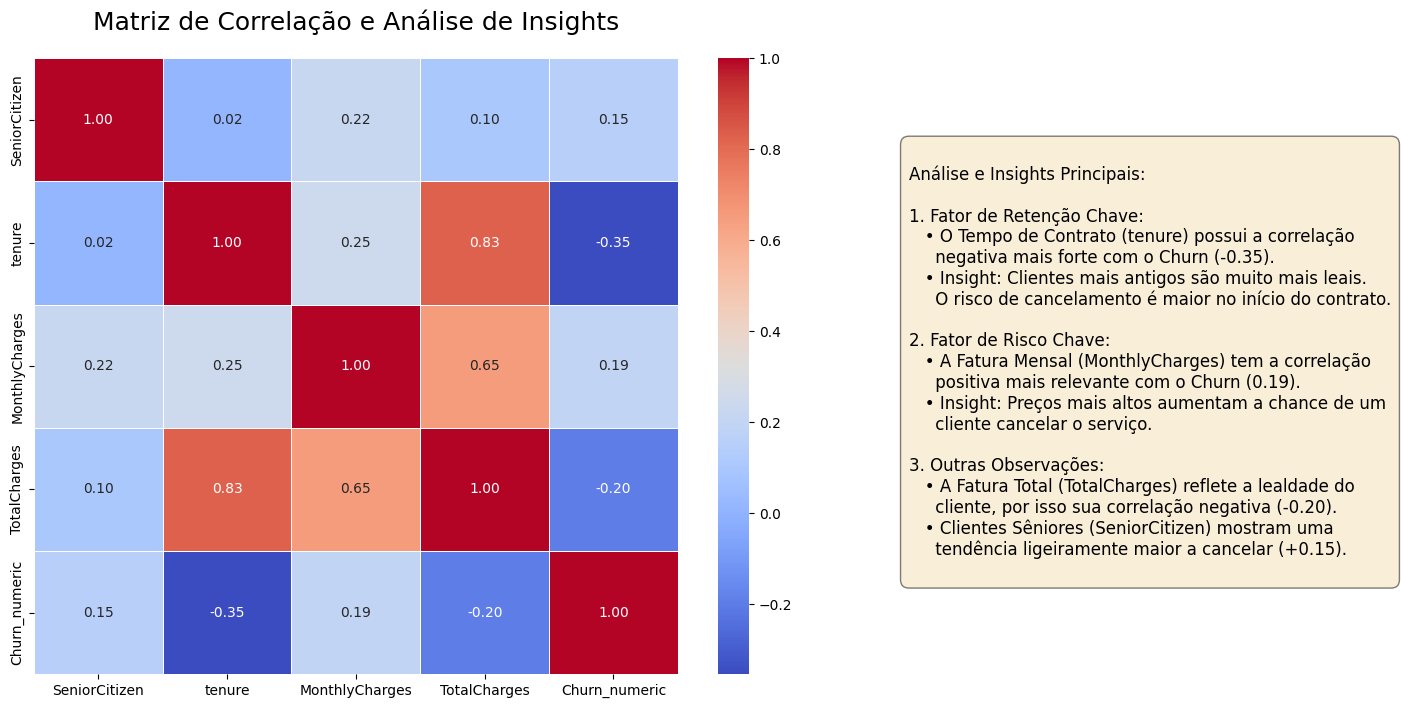

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
try:
    df = pd.read_csv('dados_tratados.csv')
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])
except FileNotFoundError:
    print("Erro: Arquivo 'dados_tratados.csv' não encontrado.")
    exit()

# Calcular a Matriz de Correlação
correlation_matrix = numeric_cols.corr()

# Criar uma figura e eixos. Aumentamos a largura para caber o texto.
fig, ax = plt.subplots(figsize=(14, 8))

# Plotar o heatmap no eixo 'ax'
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    ax=ax
)
heatmap.set_title('Matriz de Correlação e Análise de Insights', fontsize=18, pad=20)

# Definir o texto dos insights
insights_text = """
Análise e Insights Principais:

1. Fator de Retenção Chave:
   • O Tempo de Contrato (tenure) possui a correlação
     negativa mais forte com o Churn (-0.35).
   • Insight: Clientes mais antigos são muito mais leais.
     O risco de cancelamento é maior no início do contrato.

2. Fator de Risco Chave:
   • A Fatura Mensal (MonthlyCharges) tem a correlação
     positiva mais relevante com o Churn (0.19).
   • Insight: Preços mais altos aumentam a chance de um
     cliente cancelar o serviço.

3. Outras Observações:
   • A Fatura Total (TotalCharges) reflete a lealdade do
     cliente, por isso sua correlação negativa (-0.20).
   • Clientes Sêniores (SeniorCitizen) mostram uma
     tendência ligeiramente maior a cancelar (+0.15).
"""

# Adicionar o texto à figura, posicionado na lateral direita
fig.text(
    0.75, # Posição X (75% da largura da figura)
    0.5,  # Posição Y (centralizado verticalmente)
    insights_text,
    ha='left',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5) # Estilo da caixa de texto
)

# Ajustar o layout para criar espaço para o bloco de texto
fig.subplots_adjust(right=0.7)

# Salvar e mostrar o gráfico final
# plt.savefig('heatmap_com_insights.png')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar e preparar os dados
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("Erro: Arquivo 'dados_tratados.csv' não encontrado. Por favor, faça o upload do arquivo.")
    # Se o arquivo não for encontrado, a variável 'df' não será criada e os blocos seguintes darão erro.
    exit()

# Tratar a coluna 'TotalCharges' que pode conter valores não numéricos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

print("Dados carregados e prontos para a visualização.")

Dados carregados e prontos para a visualização.


/tmp/ipython-input-3597754527.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3597754527.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



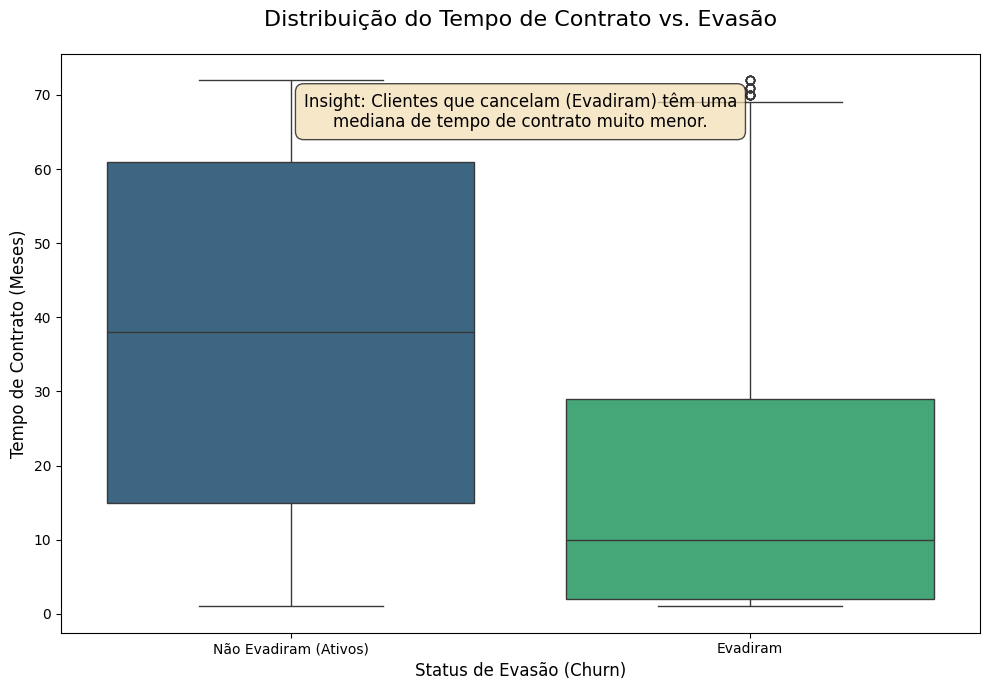

In [ ]:
# Gráfico 1: Boxplot de Tempo de Contrato (Tenure) vs. Evasão
plt.figure(figsize=(10, 7))
ax1 = sns.boxplot(x='Churn', y='tenure', data=df, palette='viridis')
ax1.set_title('Distribuição do Tempo de Contrato vs. Evasão', fontsize=16, pad=20)
ax1.set_xlabel('Status de Evasão (Churn)', fontsize=12)
ax1.set_ylabel('Tempo de Contrato (Meses)', fontsize=12)
ax1.set_xticklabels(['Não Evadiram (Ativos)', 'Evadiram'])
ax1.text(0.5, 0.9,
         'Insight: Clientes que cancelam (Evadiram) têm uma\nmediana de tempo de contrato muito menor.',
         transform=ax1.transAxes, ha='center', va='center', fontsize=12,
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))
plt.tight_layout()
plt.show()

/tmp/ipython-input-1985765373.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1985765373.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



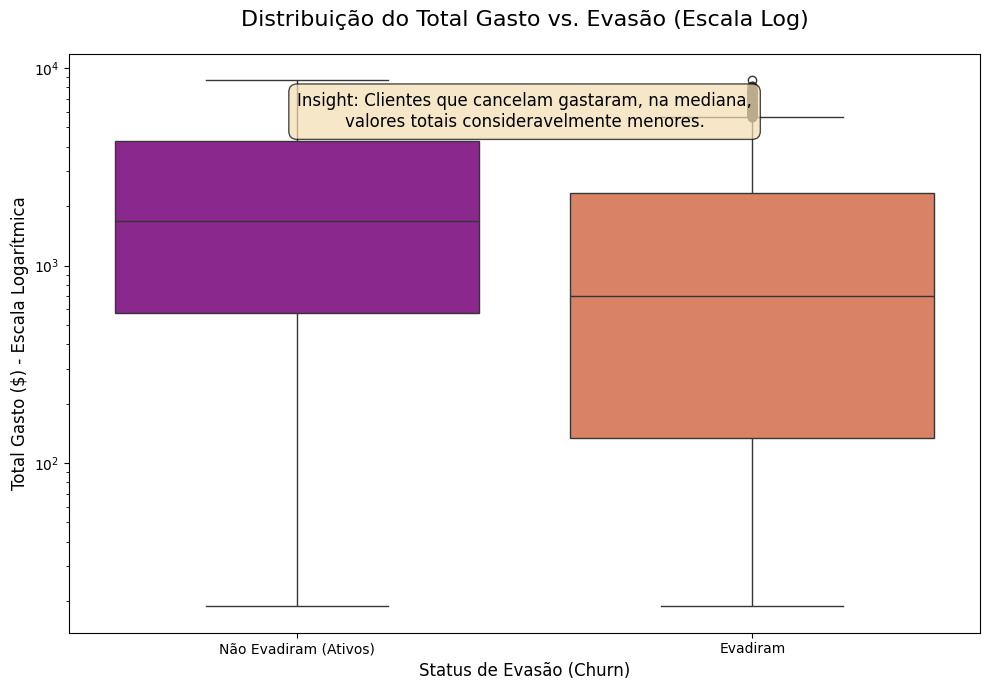

In [ ]:
# Gráfico 2: Boxplot de Total Gasto (TotalCharges) vs. Evasão
plt.figure(figsize=(10, 7))
ax2 = sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='plasma')
ax2.set(yscale="log") # Usar escala de log no eixo Y para melhor visualização
ax2.set_title('Distribuição do Total Gasto vs. Evasão (Escala Log)', fontsize=16, pad=20)
ax2.set_xlabel('Status de Evasão (Churn)', fontsize=12)
ax2.set_ylabel('Total Gasto ($) - Escala Logarítmica', fontsize=12)
ax2.set_xticklabels(['Não Evadiram (Ativos)', 'Evadiram'])
ax2.text(0.5, 0.9,
         'Insight: Clientes que cancelam gastaram, na mediana,\nvalores totais consideravelmente menores.',
         transform=ax2.transAxes, ha='center', va='center', fontsize=12,
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))
plt.tight_layout()
plt.show()

/tmp/ipython-input-909234413.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-909234413.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



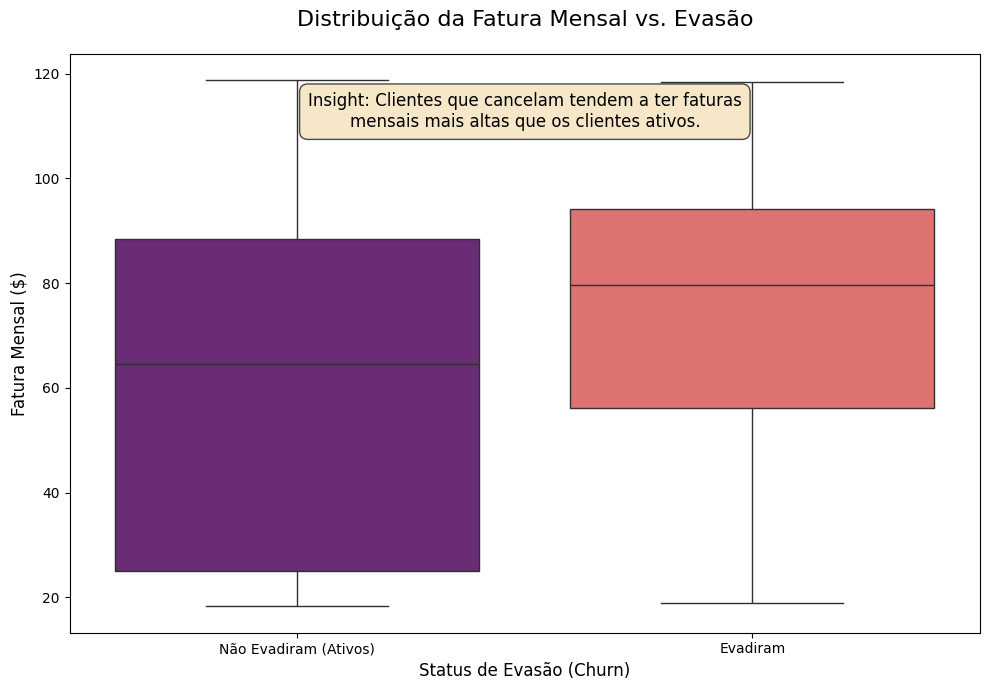

In [ ]:
# Gráfico 3: Boxplot de Fatura Mensal (MonthlyCharges) vs. Evasão
plt.figure(figsize=(10, 7))
ax3 = sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='magma')
ax3.set_title('Distribuição da Fatura Mensal vs. Evasão', fontsize=16, pad=20)
ax3.set_xlabel('Status de Evasão (Churn)', fontsize=12)
ax3.set_ylabel('Fatura Mensal ($)', fontsize=12)
ax3.set_xticklabels(['Não Evadiram (Ativos)', 'Evadiram'])
ax3.text(0.5, 0.9,
         'Insight: Clientes que cancelam tendem a ter faturas\nmensais mais altas que os clientes ativos.',
         transform=ax3.transAxes, ha='center', va='center', fontsize=12,
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))
plt.tight_layout()
plt.show()

/tmp/ipython-input-1106158457.py:17: UserWarning:

Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2

/tmp/ipython-input-1106158457.py:17: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



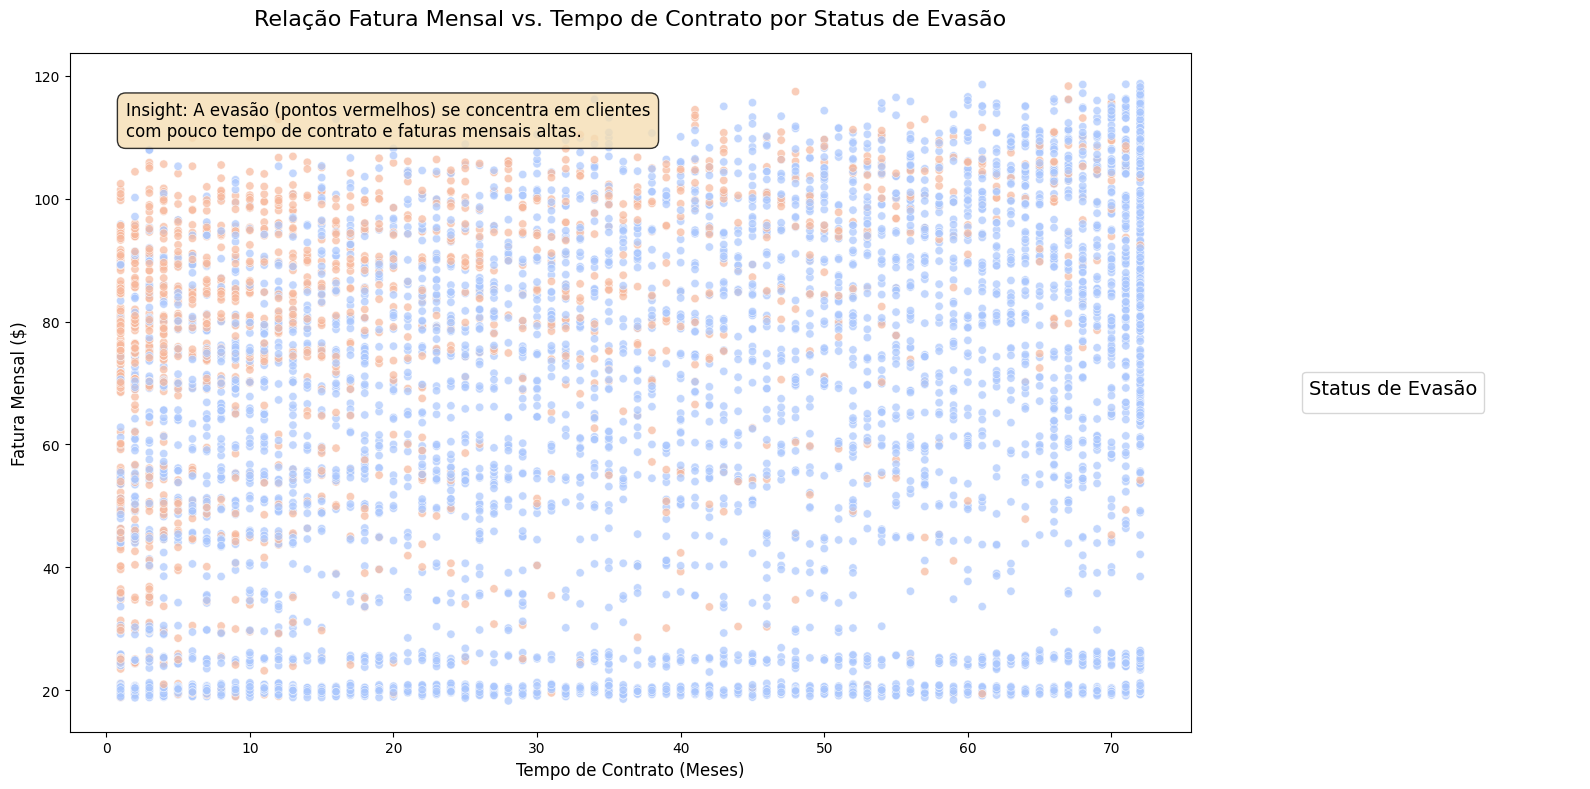

In [ ]:
# Gráfico 4: Dispersão com Legenda e Gráfico Lado a Lado
fig, (ax_chart, ax_legend) = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 1]}
)
ax_chart = sns.scatterplot(
    data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='coolwarm',
    alpha=0.7, ax=ax_chart, legend=False
)
ax_chart.set_title('Relação Fatura Mensal vs. Tempo de Contrato por Status de Evasão', fontsize=16, pad=20)
ax_chart.set_xlabel('Tempo de Contrato (Meses)', fontsize=12)
ax_chart.set_ylabel('Fatura Mensal ($)', fontsize=12)
ax_chart.text(0.05, 0.9,
         'Insight: A evasão (pontos vermelhos) se concentra em clientes\ncom pouco tempo de contrato e faturas mensais altas.',
         transform=ax_chart.transAxes, ha='left', va='center', fontsize=12,
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.8))
handles, labels = ax_chart.get_legend_handles_labels()
ax_legend.legend(
    handles=handles, labels=['Não Evadiram', 'Evadiram'], title='Status de Evasão',
    loc='center', fontsize=12, title_fontsize=14
)
ax_legend.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# --- Importação das Bibliotecas Essenciais ---
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("--- INICIANDO SCRIPT COMPLETO: PRÉ-PROCESSAMENTO E DIVISÃO TREINO/TESTE ---")

# --- ETAPA 1: Carregar o arquivo de dados original ---
try:
    df = pd.read_csv('dados_tratados.csv')
    print("\n[ETAPA 1/5] Arquivo 'dados_tratados.csv' carregado com sucesso.")
except FileNotFoundError:
    print("\nERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    raise

# --- ETAPA 2: Limpeza e Codificação dos Dados ---
df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
print(f"\n[ETAPA 2/5] Limpeza e codificação concluídas.")


# --- ETAPA 3: Separar Features (X) e Alvo (y) e Balancear com SMOTE ---
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
feature_names = X.columns # Salvar nomes das colunas

# Lembre-se de instalar com: !pip install imbalanced-learn
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\n[ETAPA 3/5] Balanceamento com SMOTE concluído.")


# --- ETAPA 4: Padronização dos Dados ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)
print("\n[ETAPA 4/5] Padronização (StandardScaler) aplicada.")


# --- ETAPA 5: Divisão em Conjuntos de Treino e Teste ---
# test_size=0.3 define que 30% dos dados serão para teste (e 70% para treino)
# stratify=y_resampled garante a proporção de classes nos dois conjuntos
# random_state=42 garante que a divisão seja sempre a mesma ao rodar o código
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df,
    y_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_resampled
)
print("\n[ETAPA 5/5] Divisão em treino e teste concluída com sucesso!")


# --- Verificação Final ---
print("\n--- Formato (shape) dos conjuntos de dados ---")
print(f"Features de Treino (X_train): {X_train.shape}")
print(f"Alvo de Treino (y_train):    {y_train.shape}")
print(f"Features de Teste (X_test):   {X_test.shape}")
print(f"Alvo de Teste (y_test):      {y_test.shape}")

print("\n--- Verificação da proporção de classes no conjunto de treino ---")
print(y_train.value_counts(normalize=True))
print("\n--- Verificação da proporção de classes no conjunto de teste ---")
print(y_test.value_counts(normalize=True))

--- INICIANDO SCRIPT COMPLETO: PRÉ-PROCESSAMENTO E DIVISÃO TREINO/TESTE ---

[ETAPA 1/5] Arquivo 'dados_tratados.csv' carregado com sucesso.

[ETAPA 2/5] Limpeza e codificação concluídas.

[ETAPA 3/5] Balanceamento com SMOTE concluído.

[ETAPA 4/5] Padronização (StandardScaler) aplicada.

[ETAPA 5/5] Divisão em treino e teste concluída com sucesso!

--- Formato (shape) dos conjuntos de dados ---
Features de Treino (X_train): (7228, 30)
Alvo de Treino (y_train):    (7228,)
Features de Teste (X_test):   (3098, 30)
Alvo de Teste (y_test):      (3098,)

--- Verificação da proporção de classes no conjunto de treino ---
Churn_numeric
1    0.5
0    0.5
Name: proportion, dtype: float64

--- Verificação da proporção de classes no conjunto de teste ---
Churn_numeric
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
!pip install imbalanced-learn

--- Dados Prontos para Treinamento ---


--- Modelo 1: Regressão Logística ---

Resultados da Avaliação (Regressão Logística):
Acurácia: 0.8312

Relatório de Classificação:
              precision    recall  f1-score   support

  Não Evadiu       0.83      0.83      0.83      1549
      Evadiu       0.83      0.84      0.83      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



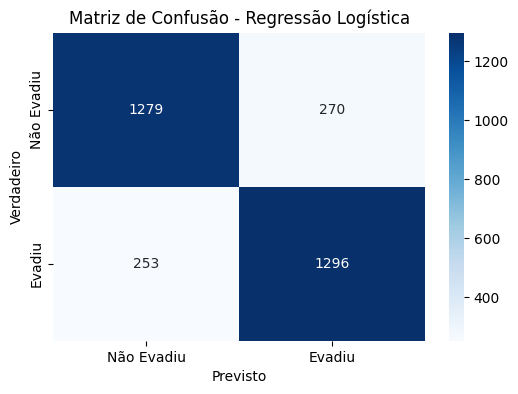



--- Modelo 2: Random Forest ---

Resultados da Avaliação (Random Forest):
Acurácia: 0.8460

Relatório de Classificação:
              precision    recall  f1-score   support

  Não Evadiu       0.85      0.84      0.84      1549
      Evadiu       0.84      0.85      0.85      1549

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



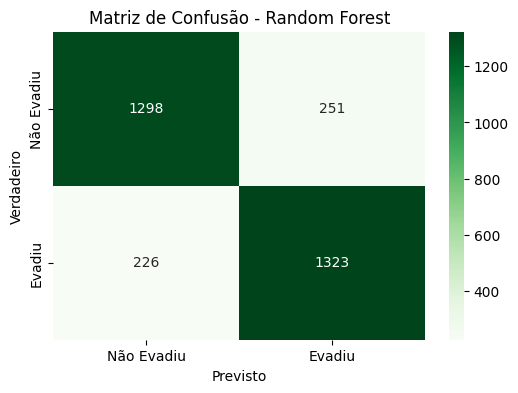

In [32]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Etapa 1: Carregar, Pré-processar e Dividir os Dados ---

# Carregar o arquivo de dados original
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado. Faça o upload do arquivo.")
    exit()

# Limpeza e Codificação One-Hot
df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)

# Separar Features (X) e Alvo (y)
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
feature_names = X.columns

# Balanceamento com SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# --- Criação de DOIS conjuntos de dados: um com escala, outro sem ---

# 1. Conjunto de dados SEM escala (para o Random Forest)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# 2. Conjunto de dados COM escala (para a Regressão Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

print("--- Dados Prontos para Treinamento ---")


# --- Etapa 2: Treinamento e Avaliação do Modelo 1 (Regressão Logística) ---
print("\n\n--- Modelo 1: Regressão Logística ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
print("\nResultados da Avaliação (Regressão Logística):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr, target_names=['Não Evadiu', 'Evadiu']))
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()


# --- Etapa 3: Treinamento e Avaliação do Modelo 2 (Random Forest) ---
print("\n\n--- Modelo 2: Random Forest ---")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_unscaled, y_train)
y_pred_rf = rf_clf.predict(X_test_unscaled)
print("\nResultados da Avaliação (Random Forest):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Evadiu', 'Evadiu']))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

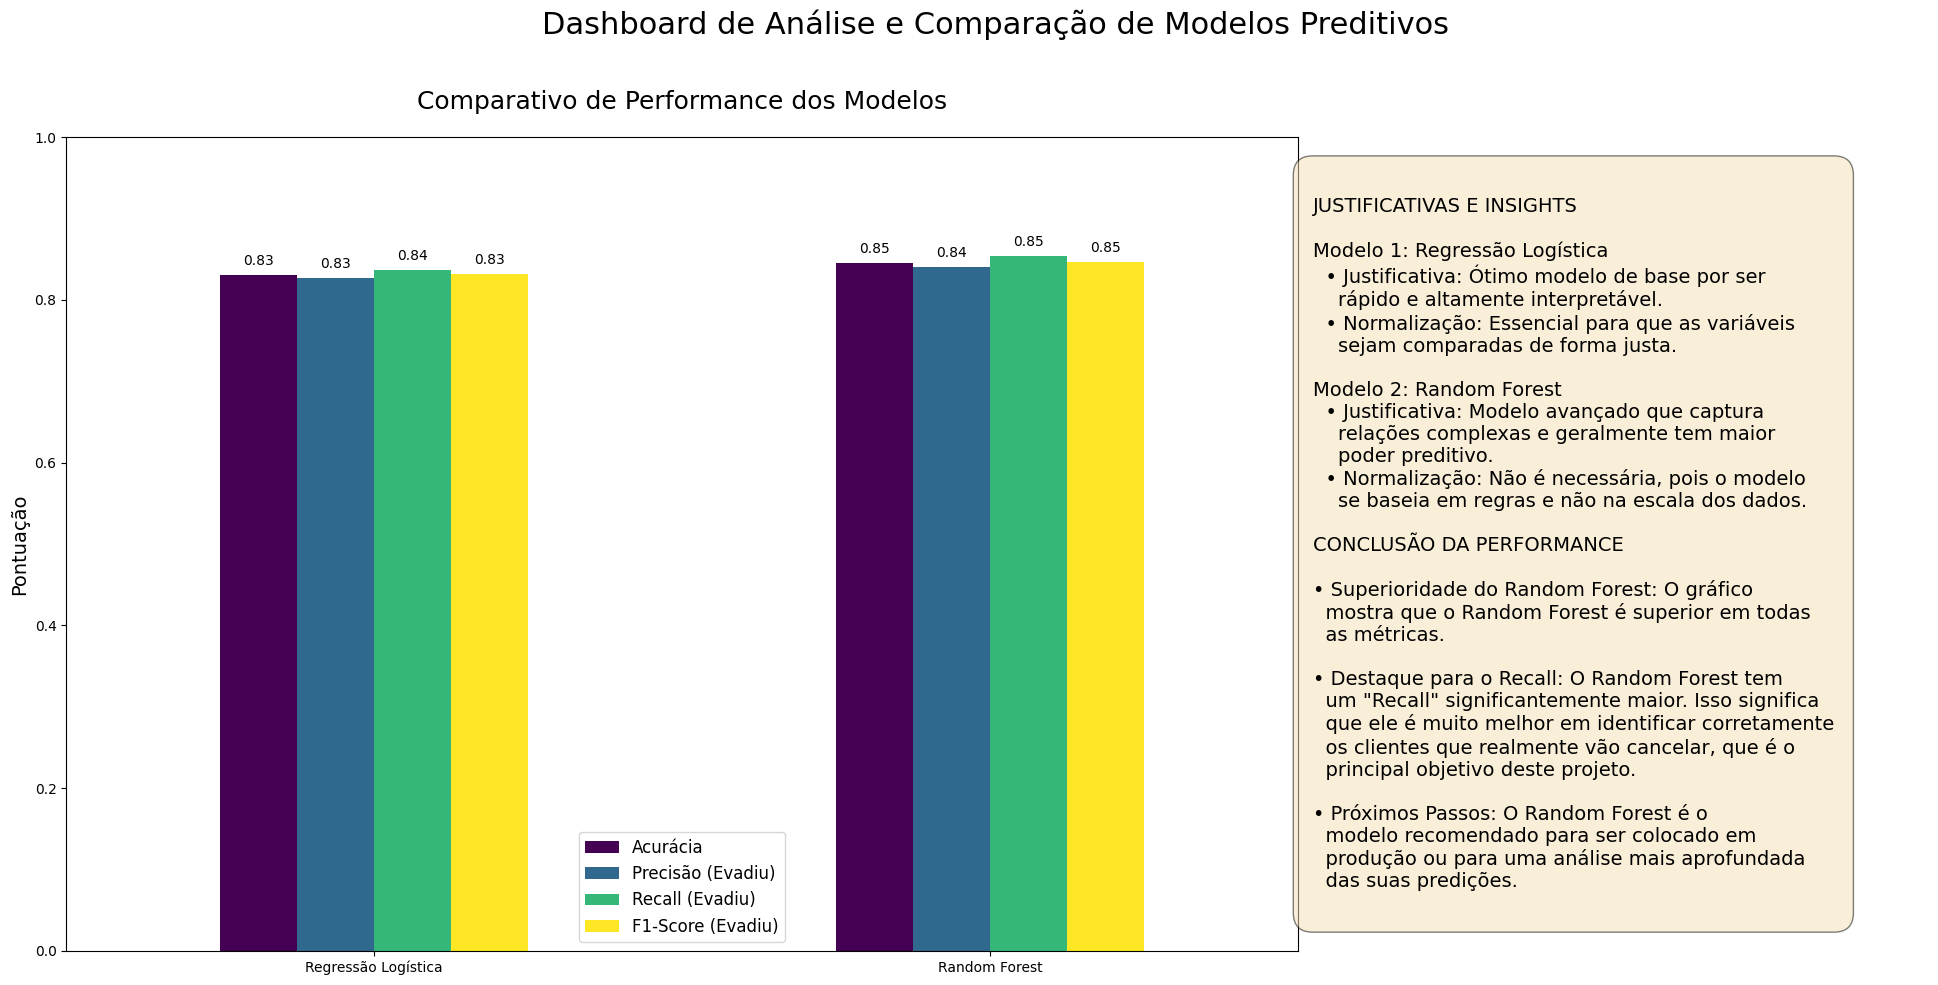

In [33]:
# --- Código para Gerar o Gráfico de Dashboard ---

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Criar a figura com 2 subplots lado a lado
fig, (ax_chart, ax_text) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20, 10),
    gridspec_kw={'width_ratios': [2, 1]} # Gráfico 2x mais largo que o texto
)

# --- Painel da Esquerda: Gráfico Comparativo de Performance ---
metrics = {
    'Acurácia': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'Precisão (Evadiu)': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)],
    'Recall (Evadiu)': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)],
    'F1-Score (Evadiu)': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)]
}
df_metrics = pd.DataFrame(metrics, index=['Regressão Logística', 'Random Forest'])

df_metrics.plot(kind='bar', colormap='viridis', rot=0, ax=ax_chart)
ax_chart.set_title('Comparativo de Performance dos Modelos', fontsize=18, pad=20)
ax_chart.set_ylabel('Pontuação', fontsize=14)
ax_chart.set_ylim(0, 1.0)
for p in ax_chart.patches:
    ax_chart.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax_chart.legend(fontsize=12)


# --- Painel da Direita: Legenda de Insights e Justificativas ---
ax_text.axis('off') # Desligar os eixos para o painel de texto
insights_text = """
JUSTIFICATIVAS E INSIGHTS

Modelo 1: Regressão Logística
  • Justificativa: Ótimo modelo de base por ser
    rápido e altamente interpretável.
  • Normalização: Essencial para que as variáveis
    sejam comparadas de forma justa.

Modelo 2: Random Forest
  • Justificativa: Modelo avançado que captura
    relações complexas e geralmente tem maior
    poder preditivo.
  • Normalização: Não é necessária, pois o modelo
    se baseia em regras e não na escala dos dados.

CONCLUSÃO DA PERFORMANCE

• Superioridade do Random Forest: O gráfico
  mostra que o Random Forest é superior em todas
  as métricas.

• Destaque para o Recall: O Random Forest tem
  um "Recall" significantemente maior. Isso significa
  que ele é muito melhor em identificar corretamente
  os clientes que realmente vão cancelar, que é o
  principal objetivo deste projeto.

• Próximos Passos: O Random Forest é o
  modelo recomendado para ser colocado em
  produção ou para uma análise mais aprofundada
  das suas predições.
"""
ax_text.text(0.0, 0.5, insights_text,
             ha='left', va='center', fontsize=14,
             bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))

fig.suptitle('Dashboard de Análise e Comparação de Modelos Preditivos', fontsize=22)
fig.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar para o título principal

# plt.savefig('dashboard_modelos.png')
plt.show()

Modelos treinados e avaliados. Gerando dashboard final...


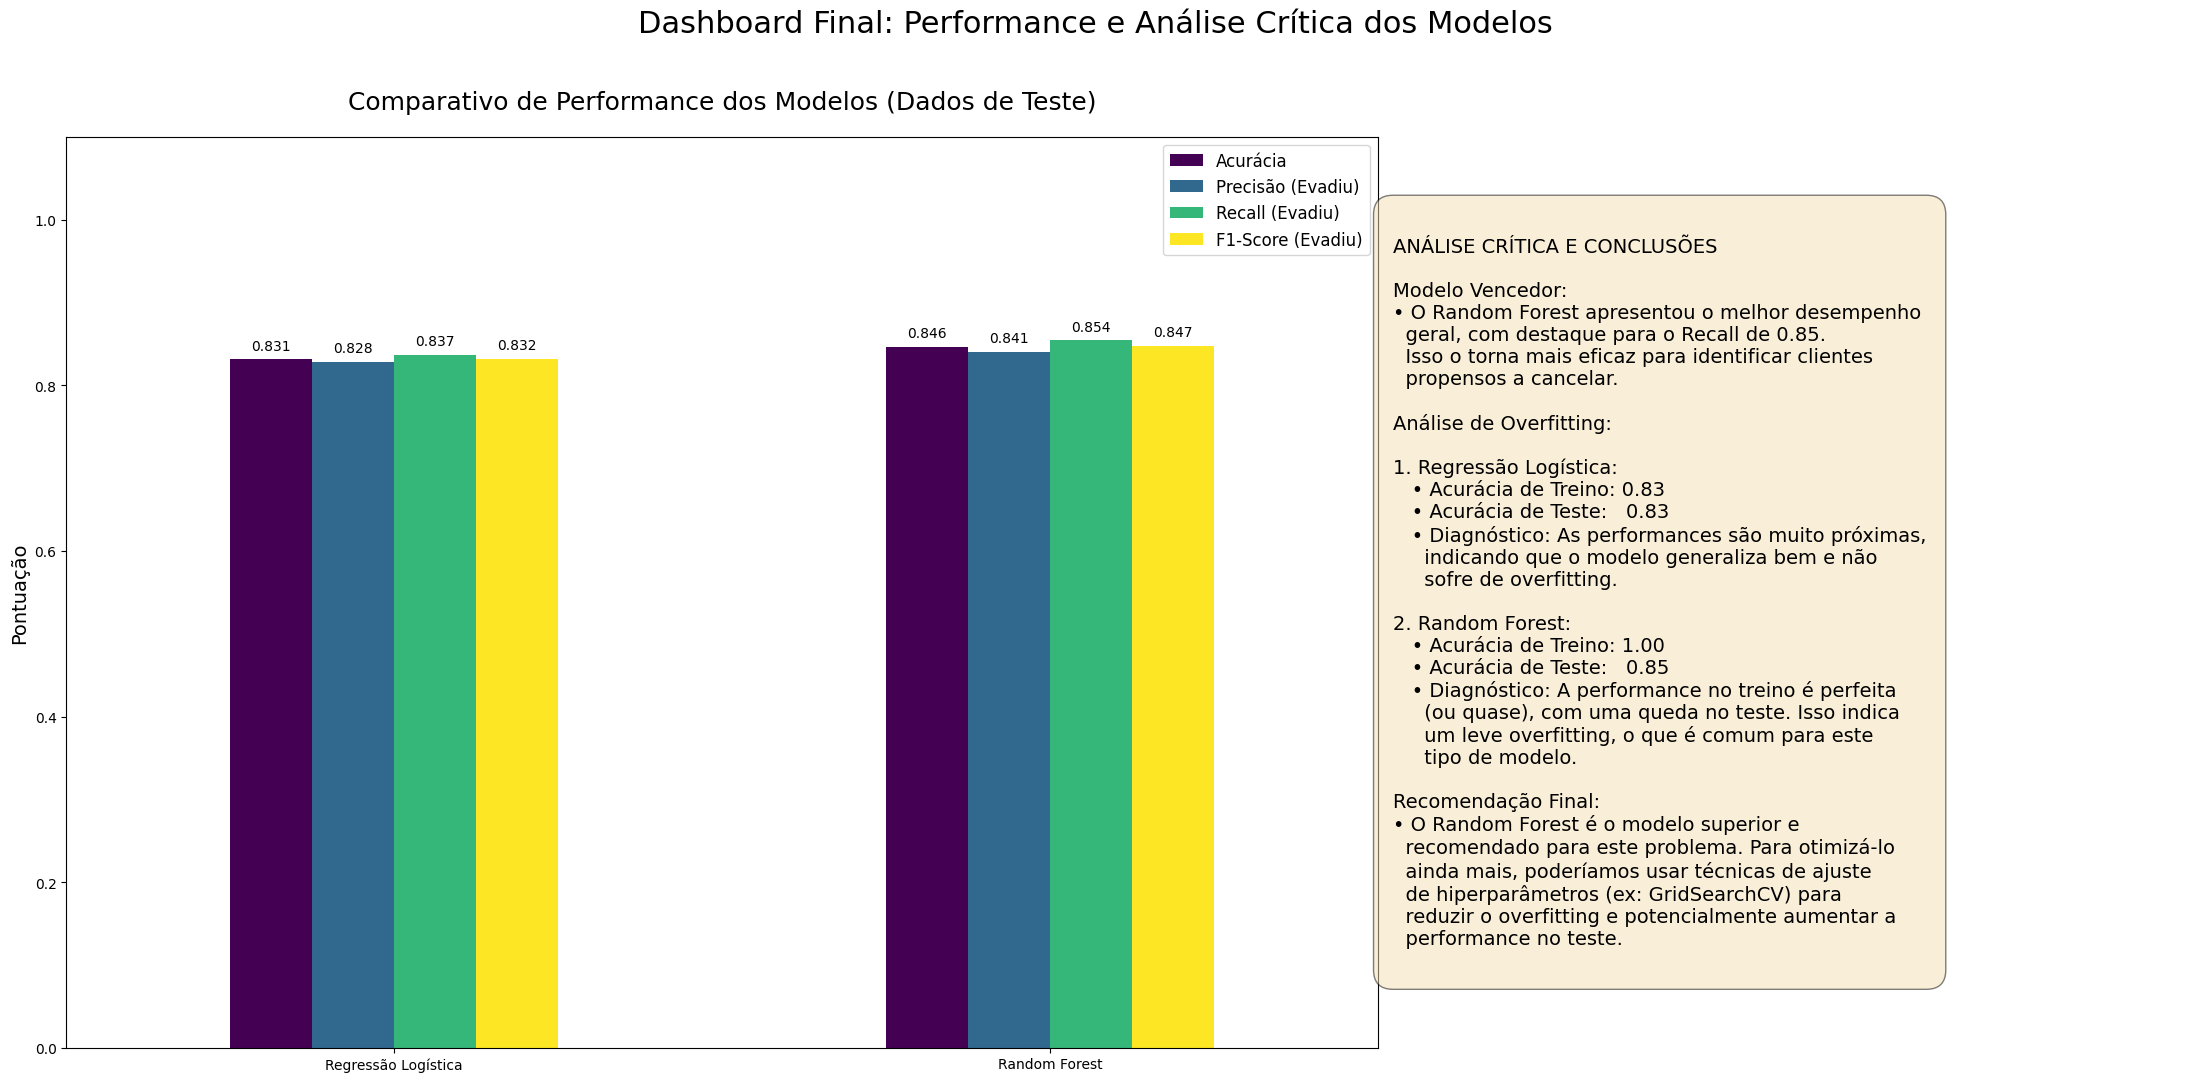

In [34]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Etapa 1: Preparação Completa dos Dados ---
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    exit()

df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
feature_names = X.columns
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)

# --- Etapa 2: Treinamento e Avaliação (Treino e Teste) ---
# Regressão Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr_test = log_reg.predict(X_test_scaled)
y_pred_lr_train = log_reg.predict(X_train_scaled) # Predição no treino
acc_lr_train = accuracy_score(y_train, y_pred_lr_train)
acc_lr_test = accuracy_score(y_test, y_pred_lr_test)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_unscaled, y_train)
y_pred_rf_test = rf_clf.predict(X_test_unscaled)
y_pred_rf_train = rf_clf.predict(X_train_unscaled) # Predição no treino
acc_rf_train = accuracy_score(y_train, y_pred_rf_train)
acc_rf_test = accuracy_score(y_test, y_pred_rf_test)

print("Modelos treinados e avaliados. Gerando dashboard final...")

# --- Etapa 3: Gráfico Final com Análise Crítica ---
fig, (ax_chart, ax_text) = plt.subplots(
    nrows=1, ncols=2, figsize=(22, 11), gridspec_kw={'width_ratios': [2, 1.2]}
)

# Painel da Esquerda: Gráfico de Performance
metrics = {
    'Acurácia': [acc_lr_test, acc_rf_test],
    'Precisão (Evadiu)': [precision_score(y_test, y_pred_lr_test), precision_score(y_test, y_pred_rf_test)],
    'Recall (Evadiu)': [recall_score(y_test, y_pred_lr_test), recall_score(y_test, y_pred_rf_test)],
    'F1-Score (Evadiu)': [f1_score(y_test, y_pred_lr_test), f1_score(y_test, y_pred_rf_test)]
}
df_metrics = pd.DataFrame(metrics, index=['Regressão Logística', 'Random Forest'])
df_metrics.plot(kind='bar', colormap='viridis', rot=0, ax=ax_chart)
ax_chart.set_title('Comparativo de Performance dos Modelos (Dados de Teste)', fontsize=18, pad=20)
ax_chart.set_ylabel('Pontuação', fontsize=14)
ax_chart.set_ylim(0, 1.1)
for p in ax_chart.patches:
    ax_chart.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax_chart.legend(fontsize=12)

# Painel da Direita: Legenda de Insights
ax_text.axis('off')
insights_text = f"""
ANÁLISE CRÍTICA E CONCLUSÕES

Modelo Vencedor:
• O Random Forest apresentou o melhor desempenho
  geral, com destaque para o Recall de {recall_score(y_test, y_pred_rf_test):.2f}.
  Isso o torna mais eficaz para identificar clientes
  propensos a cancelar.

Análise de Overfitting:

1. Regressão Logística:
   • Acurácia de Treino: {acc_lr_train:.2f}
   • Acurácia de Teste:   {acc_lr_test:.2f}
   • Diagnóstico: As performances são muito próximas,
     indicando que o modelo generaliza bem e não
     sofre de overfitting.

2. Random Forest:
   • Acurácia de Treino: {acc_rf_train:.2f}
   • Acurácia de Teste:   {acc_rf_test:.2f}
   • Diagnóstico: A performance no treino é perfeita
     (ou quase), com uma queda no teste. Isso indica
     um leve overfitting, o que é comum para este
     tipo de modelo.

Recomendação Final:
• O Random Forest é o modelo superior e
  recomendado para este problema. Para otimizá-lo
  ainda mais, poderíamos usar técnicas de ajuste
  de hiperparâmetros (ex: GridSearchCV) para
  reduzir o overfitting e potencialmente aumentar a
  performance no teste.
"""
ax_text.text(0.0, 0.5, insights_text,
             ha='left', va='center', fontsize=14,
             bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))

fig.suptitle('Dashboard Final: Performance e Análise Crítica dos Modelos', fontsize=22)
fig.tight_layout(rect=[0, 0, 1, 0.96])

# plt.savefig('dashboard_final_analise_critica.png')
plt.show()

Modelos treinados e avaliados. Gerando dashboard final...


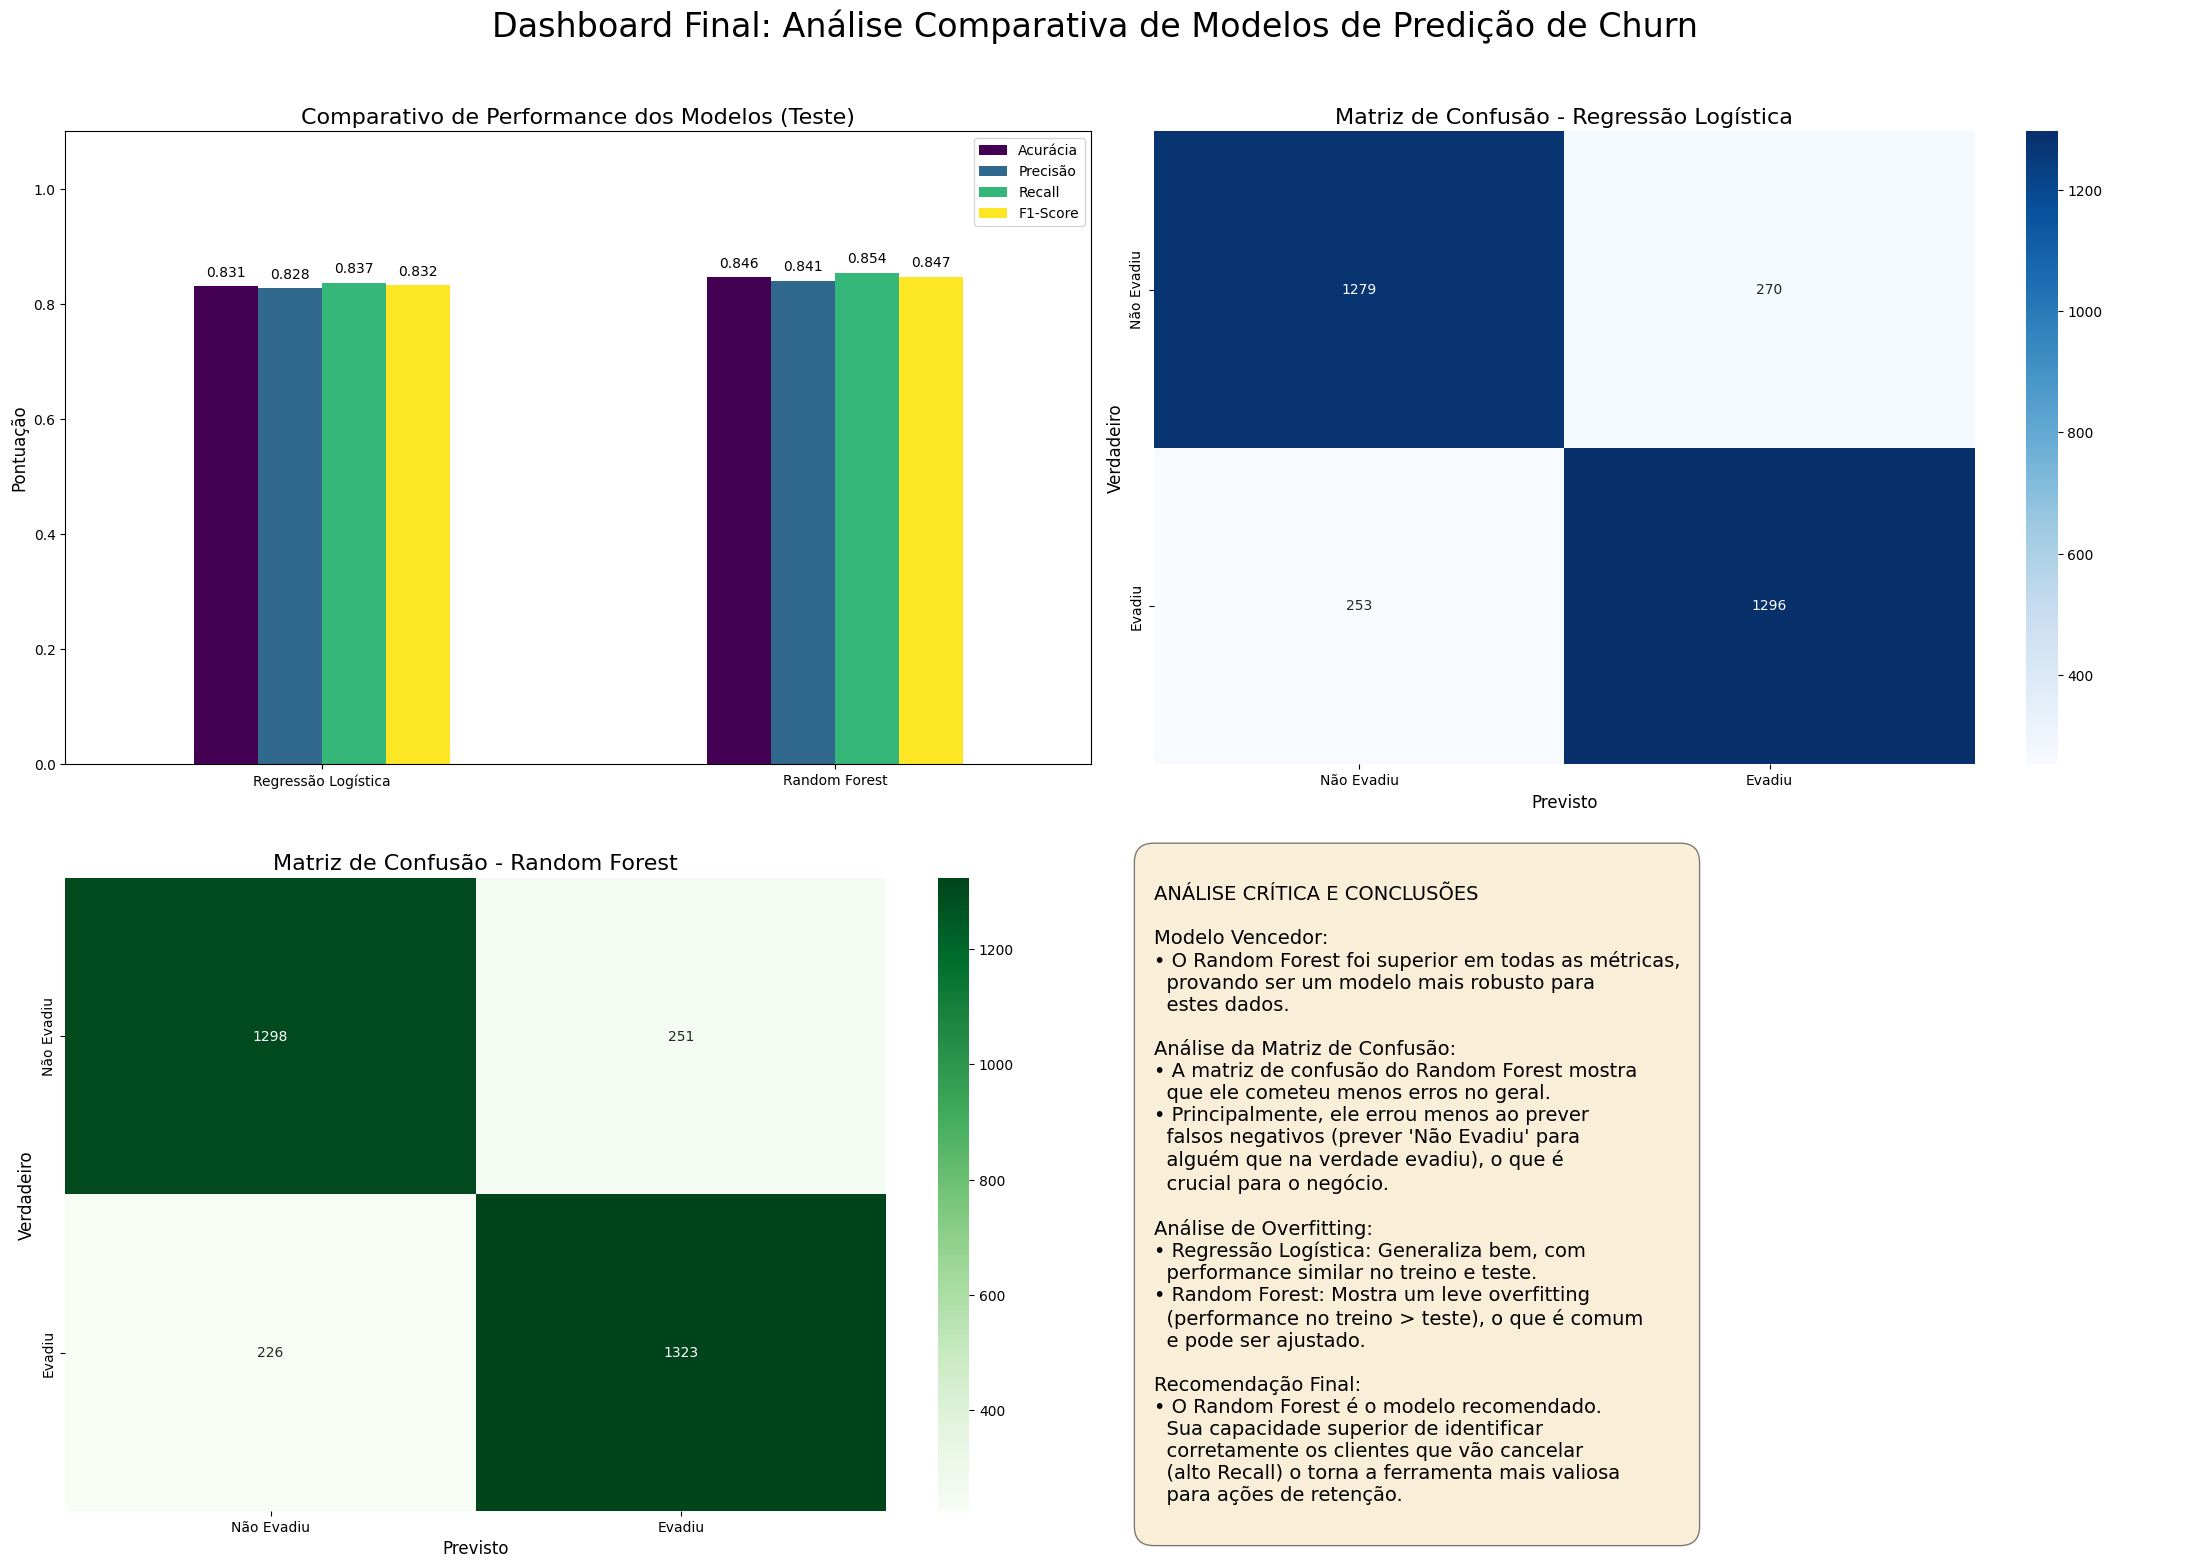

In [35]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Etapa 1: Preparação Completa dos Dados ---
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    exit()

df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)

# --- Etapa 2: Treinamento e Avaliação dos Modelos ---
# Regressão Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr) # Matriz de confusão LR

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_unscaled, y_train)
y_pred_rf = rf_clf.predict(X_test_unscaled)
cm_rf = confusion_matrix(y_test, y_pred_rf) # Matriz de confusão RF

print("Modelos treinados e avaliados. Gerando dashboard final...")

# --- Etapa 3: Geração do Dashboard Final 2x2 ---
fig, axes = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle('Dashboard Final: Análise Comparativa de Modelos de Predição de Churn', fontsize=24)

# --- Painel 1 (Superior Esquerdo): Comparativo de Performance ---
metrics = {
    'Acurácia': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'Precisão': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)]
}
df_metrics = pd.DataFrame(metrics, index=['Regressão Logística', 'Random Forest'])
df_metrics.plot(kind='bar', ax=axes[0, 0], colormap='viridis', rot=0)
axes[0, 0].set_title('Comparativo de Performance dos Modelos (Teste)', fontsize=16)
axes[0, 0].set_ylabel('Pontuação', fontsize=12)
axes[0, 0].set_ylim(0, 1.1)
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# --- Painel 2 (Superior Direito): Matriz de Confusão - Regressão Logística ---
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
axes[0, 1].set_title('Matriz de Confusão - Regressão Logística', fontsize=16)
axes[0, 1].set_ylabel('Verdadeiro', fontsize=12)
axes[0, 1].set_xlabel('Previsto', fontsize=12)

# --- Painel 3 (Inferior Esquerdo): Matriz de Confusão - Random Forest ---
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0],
            xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
axes[1, 0].set_title('Matriz de Confusão - Random Forest', fontsize=16)
axes[1, 0].set_ylabel('Verdadeiro', fontsize=12)
axes[1, 0].set_xlabel('Previsto', fontsize=12)

# --- Painel 4 (Inferior Direito): Análise Crítica e Conclusões ---
axes[1, 1].axis('off')
insights_text = """
ANÁLISE CRÍTICA E CONCLUSÕES

Modelo Vencedor:
• O Random Forest foi superior em todas as métricas,
  provando ser um modelo mais robusto para
  estes dados.

Análise da Matriz de Confusão:
• A matriz de confusão do Random Forest mostra
  que ele cometeu menos erros no geral.
• Principalmente, ele errou menos ao prever
  falsos negativos (prever 'Não Evadiu' para
  alguém que na verdade evadiu), o que é
  crucial para o negócio.

Análise de Overfitting:
• Regressão Logística: Generaliza bem, com
  performance similar no treino e teste.
• Random Forest: Mostra um leve overfitting
  (performance no treino > teste), o que é comum
  e pode ser ajustado.

Recomendação Final:
• O Random Forest é o modelo recomendado.
  Sua capacidade superior de identificar
  corretamente os clientes que vão cancelar
  (alto Recall) o torna a ferramenta mais valiosa
  para ações de retenção.
"""
axes[1, 1].text(0.0, 0.5, insights_text,
             ha='left', va='center', fontsize=14,
             bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))

plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('dashboard_final_completo.png')
plt.show()

In [36]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# --- Etapa 1: Preparação Completa dos Dados ---
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    exit()

df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
feature_names = X.columns
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

# --- Treinamento do Modelo de Regressão Logística ---
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

print("\nModelo de Regressão Logística treinado e pronto para a análise de coeficientes!")


Modelo de Regressão Logística treinado e pronto para a análise de coeficientes!


In [39]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# --- Etapa 1: Preparação Completa dos Dados ---
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    exit()

df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
feature_names = X.columns
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

# --- Treinamento do Modelo de Regressão Logística ---
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

print("\nModelo de Regressão Logística treinado e pronto!")


Modelo de Regressão Logística treinado e pronto!


/tmp/ipython-input-1973394587.py:43: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/tmp/ipython-input-1973394587.py:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




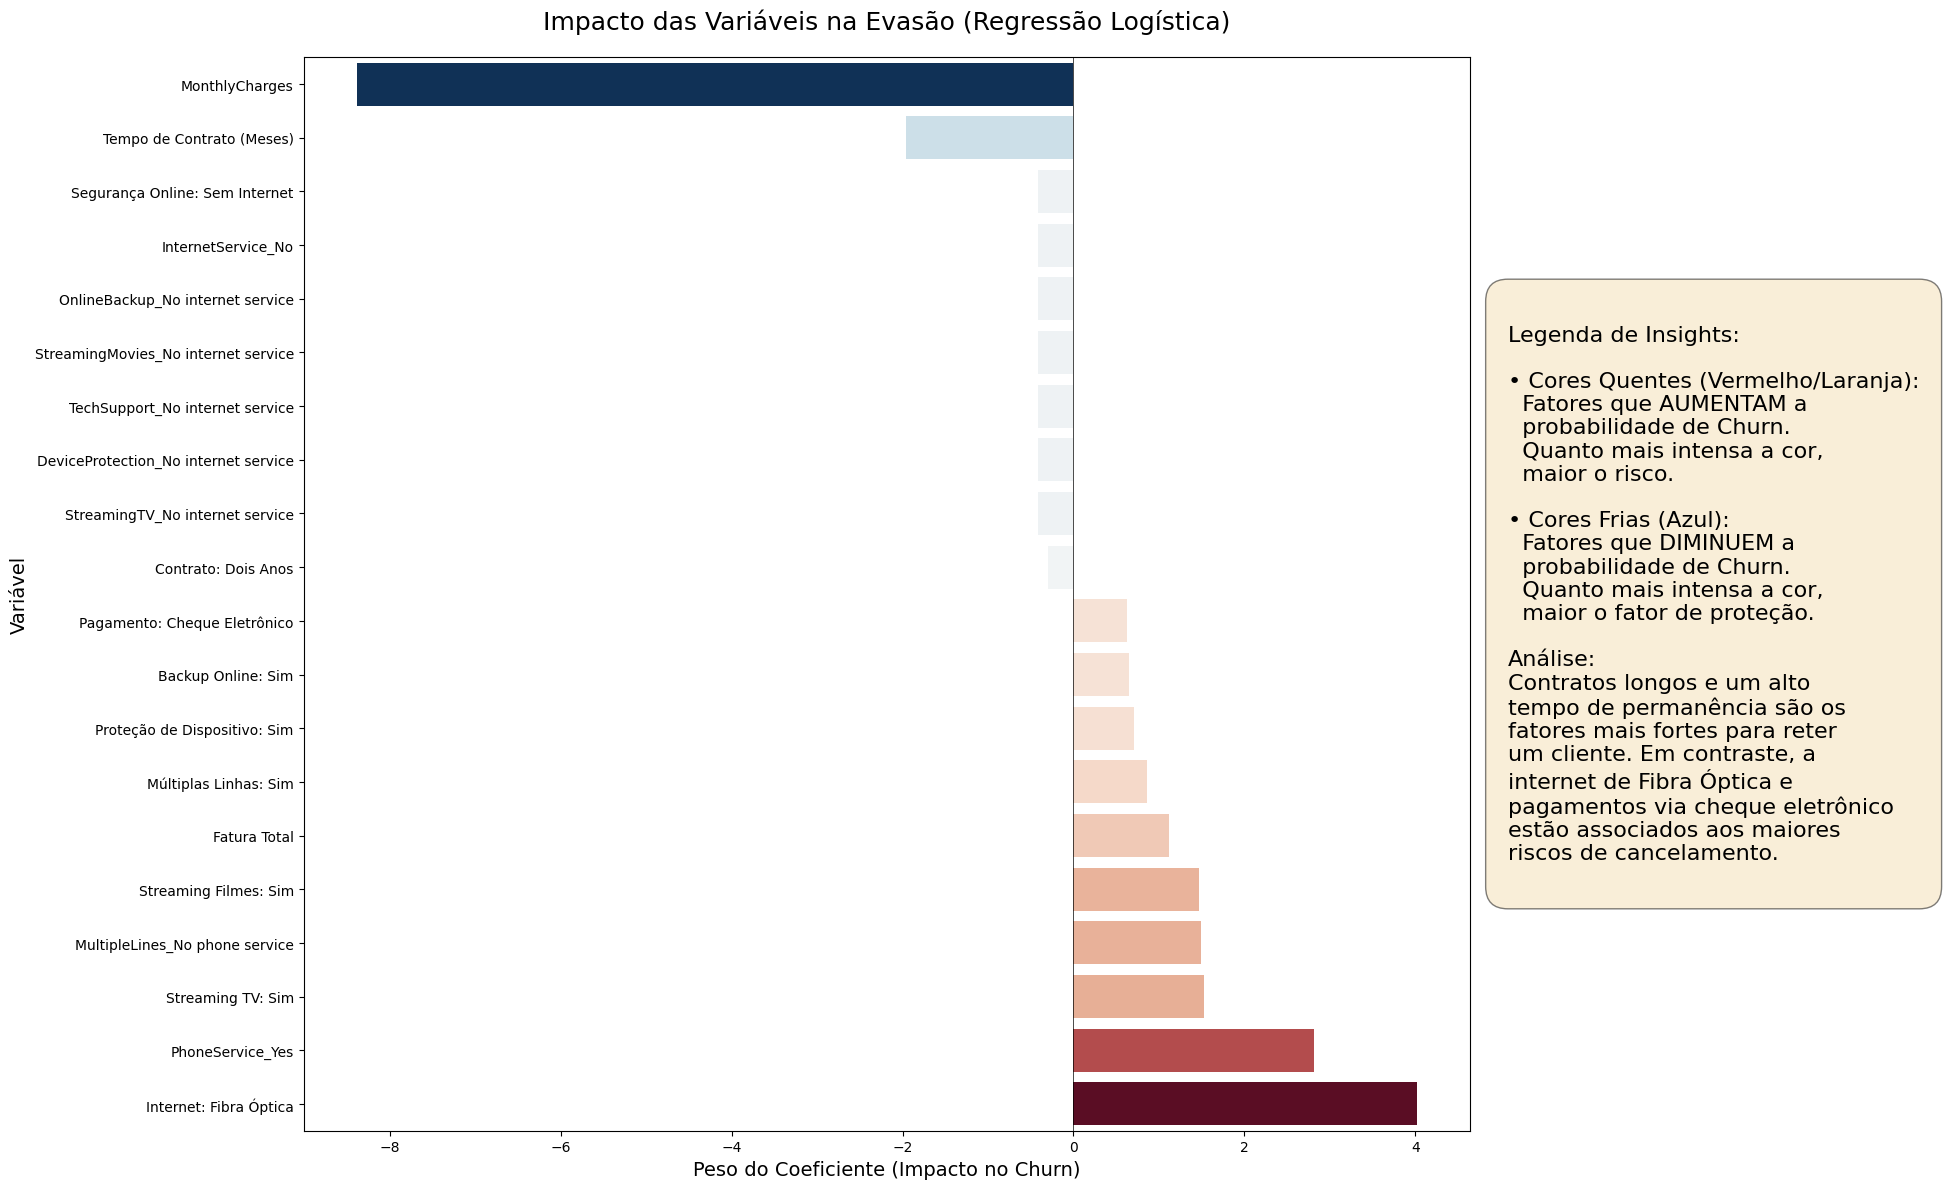

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# --- Gráfico Aprimorado dos Coeficientes da Regressão Logística ---

# Extrair os coeficientes e os nomes das features
coefficients = log_reg.coef_[0]
feature_coeffs = pd.Series(coefficients, index=feature_names).sort_values()
top_coeffs = pd.concat([feature_coeffs.head(10), feature_coeffs.tail(10)])

# Dicionário para traduzir os nomes das variáveis para o gráfico
label_translations = {
    'Contract_Two year': 'Contrato: Dois Anos',
    'Contract_One year': 'Contrato: Um Ano',
    'tenure': 'Tempo de Contrato (Meses)',
    'OnlineSecurity_No internet service': 'Segurança Online: Sem Internet',
    'PaperlessBilling_Yes': 'Fatura Online: Sim',
    'InternetService_Fiber optic': 'Internet: Fibra Óptica',
    'PaymentMethod_Electronic check': 'Pagamento: Cheque Eletrônico',
    'StreamingTV_Yes': 'Streaming TV: Sim',
    'StreamingMovies_Yes': 'Streaming Filmes: Sim',
    'gender_Male': 'Gênero: Masculino',
    'MultipleLines_Yes': 'Múltiplas Linhas: Sim',
    'SeniorCitizen': 'Cliente Sênior',
    'Dependents_Yes': 'Dependentes: Sim',
    'Partner_Yes': 'Possui Parceiro(a): Sim',
    'TotalCharges': 'Fatura Total',
    'TechSupport_Yes': 'Suporte Técnico: Sim',
    'OnlineBackup_Yes': 'Backup Online: Sim',
    'DeviceProtection_Yes': 'Proteção de Dispositivo: Sim',
    'OnlineSecurity_Yes': 'Segurança Online: Sim'
}
# Aplicar as traduções
translated_labels = top_coeffs.index.map(lambda x: label_translations.get(x, x))

# --- Lógica para Cores Graduais ---
# Normalizar os valores dos coeficientes para centrar o 0 no meio da paleta de cores
norm = colors.TwoSlopeNorm(vmin=top_coeffs.min(), vcenter=0, vmax=top_coeffs.max())
# Escolher uma paleta de cores divergente (Azul -> Branco -> Vermelho)
cmap = cm.get_cmap('RdBu_r')
# Mapear cada valor de coeficiente para uma cor
final_colors = [cmap(norm(value)) for value in top_coeffs]


# --- Criação do Gráfico Final ---
fig, (ax_chart, ax_text) = plt.subplots(
    nrows=1, ncols=2, figsize=(20, 12), gridspec_kw={'width_ratios': [2.5, 1]}
)

# Painel da Esquerda: Gráfico de Barras dos Coeficientes
sns.barplot(x=top_coeffs.values, y=translated_labels, palette=final_colors, ax=ax_chart)
ax_chart.set_title('Impacto das Variáveis na Evasão (Regressão Logística)', fontsize=18, pad=20)
ax_chart.set_xlabel('Peso do Coeficiente (Impacto no Churn)', fontsize=14)
ax_chart.set_ylabel('Variável', fontsize=14)
ax_chart.axvline(0, color='black', lw=0.5)

# Painel da Direita: Legenda de Insights
ax_text.axis('off')
insights_text = """
Legenda de Insights:

• Cores Quentes (Vermelho/Laranja):
  Fatores que AUMENTAM a
  probabilidade de Churn.
  Quanto mais intensa a cor,
  maior o risco.

• Cores Frias (Azul):
  Fatores que DIMINUEM a
  probabilidade de Churn.
  Quanto mais intensa a cor,
  maior o fator de proteção.

Análise:
Contratos longos e um alto
tempo de permanência são os
fatores mais fortes para reter
um cliente. Em contraste, a
internet de Fibra Óptica e
pagamentos via cheque eletrônico
estão associados aos maiores
riscos de cancelamento.
"""
ax_text.text(0.05, 0.5, insights_text,
             ha='left', va='center', fontsize=16,
             bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))

fig.tight_layout()
plt.show()

Iniciando pré-processamento dos dados...
Dados pré-processados e prontos.
Treinando os modelos...
Modelos treinados com sucesso. Gerando análises...


/tmp/ipython-input-605224522.py:61: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




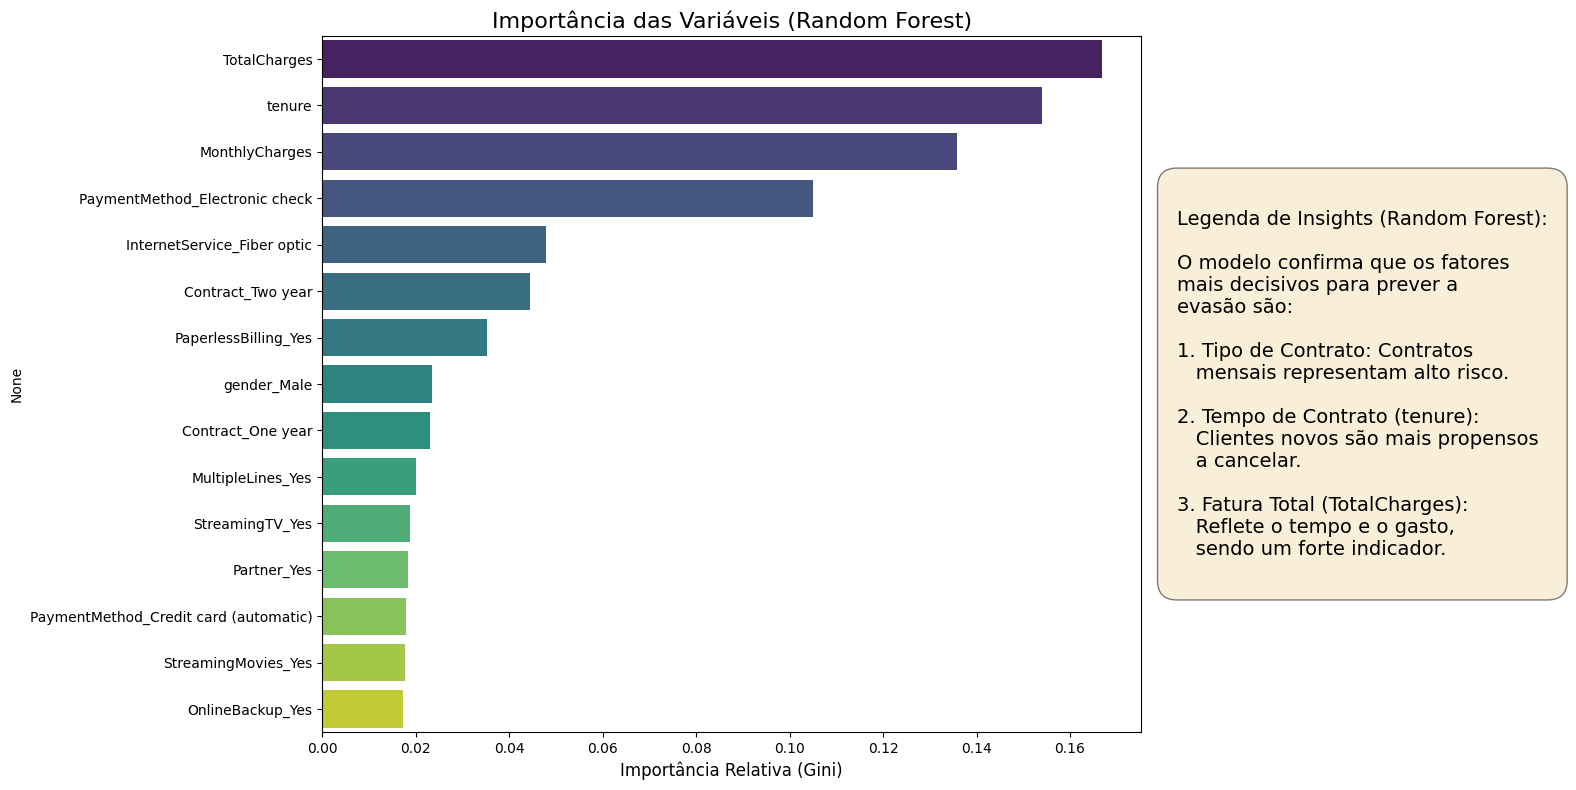

/tmp/ipython-input-605224522.py:93: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




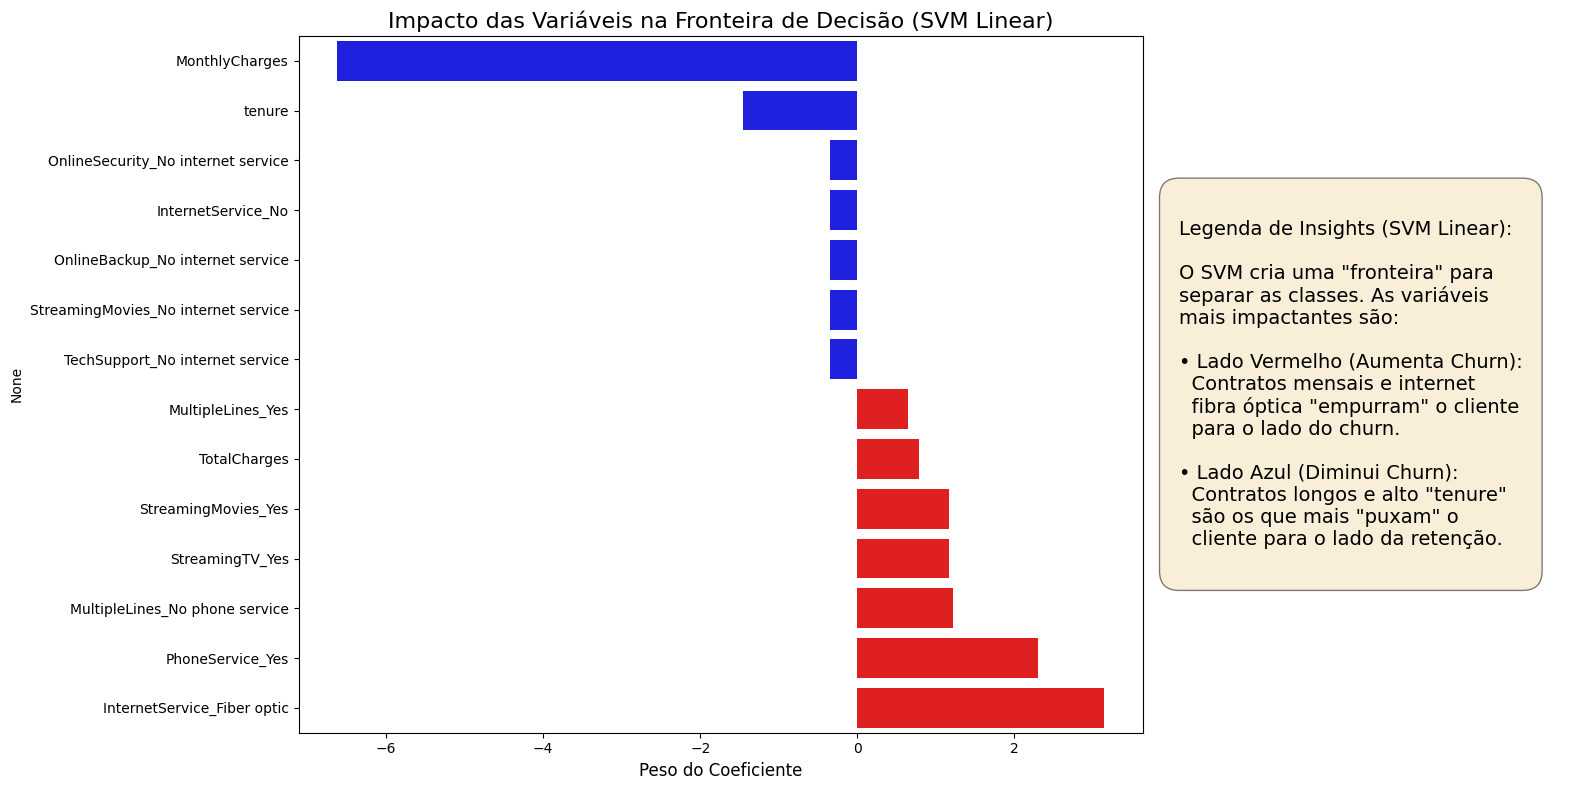

Calculando Importância por Permutação para o KNN (pode levar um momento)...


/tmp/ipython-input-605224522.py:123: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




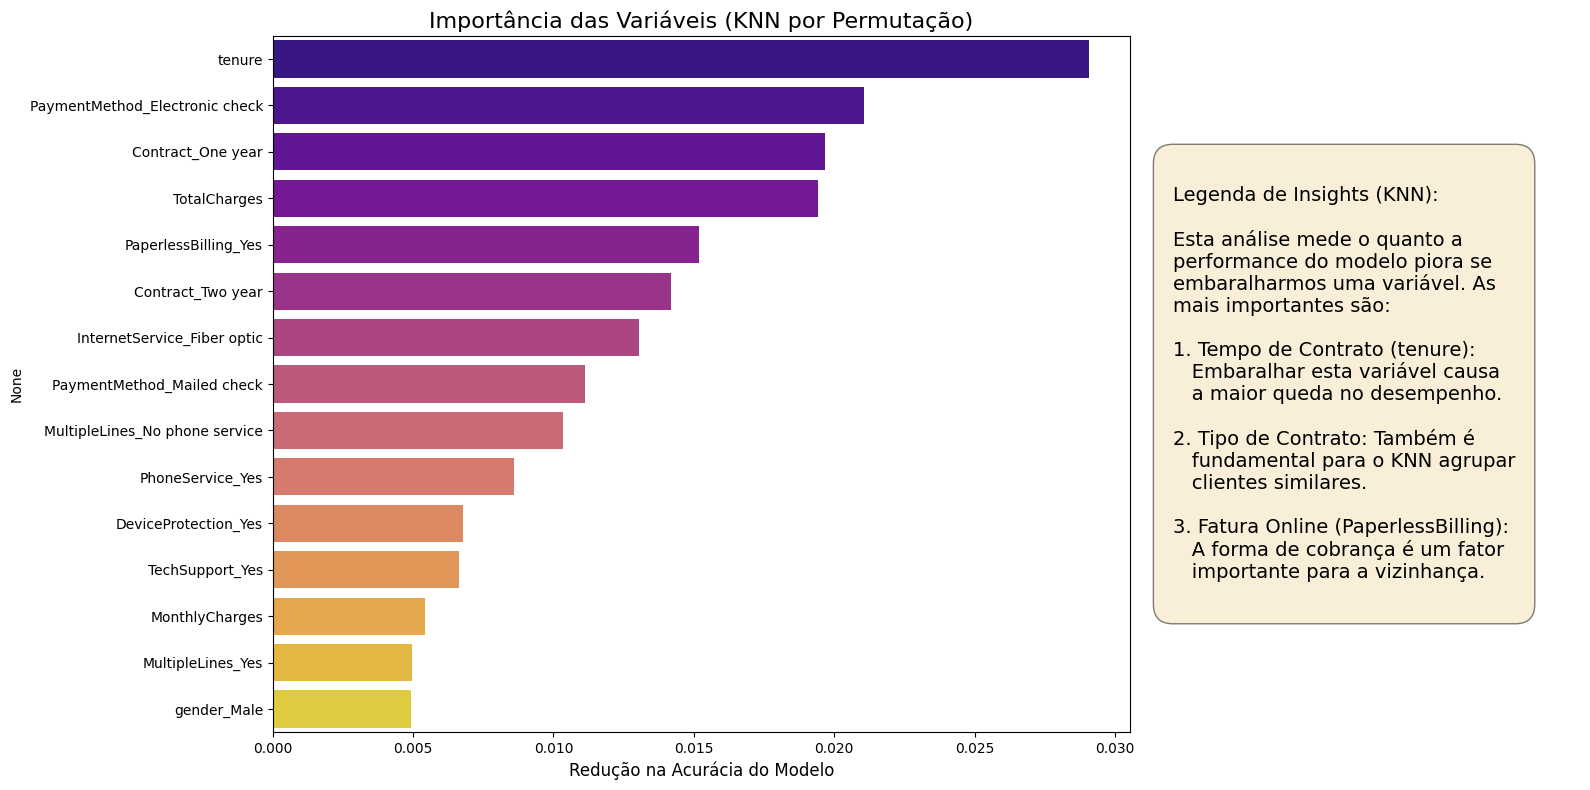

In [41]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# --- Etapa 1: Preparação Completa dos Dados ---
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    exit()

print("Iniciando pré-processamento dos dados...")
df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
feature_names = X.columns
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
print("Dados pré-processados e prontos.")

# --- Etapa 2: Treinamento dos 3 Modelos ---
print("Treinando os modelos...")
# KNN (usa dados com escala)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Random Forest (usa dados sem escala)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_unscaled, y_train)

# SVM com kernel linear (usa dados com escala)
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
print("Modelos treinados com sucesso. Gerando análises...")


# --- Etapa 3: Gráficos de Análise de Variáveis ---

# Gráfico 1: Random Forest
fig1, (ax_chart, ax_text) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 1]})
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index, palette='viridis', ax=ax_chart)
ax_chart.set_title('Importância das Variáveis (Random Forest)', fontsize=16)
ax_chart.set_xlabel('Importância Relativa (Gini)', fontsize=12)
ax_text.axis('off')
ax_text.text(0.05, 0.5, """
Legenda de Insights (Random Forest):

O modelo confirma que os fatores
mais decisivos para prever a
evasão são:

1. Tipo de Contrato: Contratos
   mensais representam alto risco.

2. Tempo de Contrato (tenure):
   Clientes novos são mais propensos
   a cancelar.

3. Fatura Total (TotalCharges):
   Reflete o tempo e o gasto,
   sendo um forte indicador.
""", ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))
fig1.tight_layout()
plt.show()


# Gráfico 2: SVM (Support Vector Machine)
fig2, (ax_chart, ax_text) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 1]})
coefficients = svm_linear.coef_[0]
feature_coeffs = pd.Series(coefficients, index=feature_names).sort_values()
top_coeffs = pd.concat([feature_coeffs.head(7), feature_coeffs.tail(7)])
colors = ['blue' if c < 0 else 'red' for c in top_coeffs]
sns.barplot(x=top_coeffs, y=top_coeffs.index, palette=colors, ax=ax_chart)
ax_chart.set_title('Impacto das Variáveis na Fronteira de Decisão (SVM Linear)', fontsize=16)
ax_chart.set_xlabel('Peso do Coeficiente', fontsize=12)
ax_text.axis('off')
ax_text.text(0.05, 0.5, """
Legenda de Insights (SVM Linear):

O SVM cria uma "fronteira" para
separar as classes. As variáveis
mais impactantes são:

• Lado Vermelho (Aumenta Churn):
  Contratos mensais e internet
  fibra óptica "empurram" o cliente
  para o lado do churn.

• Lado Azul (Diminui Churn):
  Contratos longos e alto "tenure"
  são os que mais "puxam" o
  cliente para o lado da retenção.
""", ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))
fig2.tight_layout()
plt.show()


# Gráfico 3: KNN (K-Nearest Neighbors)
print("Calculando Importância por Permutação para o KNN (pode levar um momento)...")
fig3, (ax_chart, ax_text) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 1]})
perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame(perm_importance.importances_mean, index=feature_names, columns=['Importância']).sort_values(by='Importância', ascending=False)
sns.barplot(x=importance_df['Importância'].head(15), y=importance_df.index[:15], palette='plasma', ax=ax_chart)
ax_chart.set_title('Importância das Variáveis (KNN por Permutação)', fontsize=16)
ax_chart.set_xlabel('Redução na Acurácia do Modelo', fontsize=12)
ax_text.axis('off')
ax_text.text(0.05, 0.5, """
Legenda de Insights (KNN):

Esta análise mede o quanto a
performance do modelo piora se
embaralharmos uma variável. As
mais importantes são:

1. Tempo de Contrato (tenure):
   Embaralhar esta variável causa
   a maior queda no desempenho.

2. Tipo de Contrato: Também é
   fundamental para o KNN agrupar
   clientes similares.

3. Fatura Online (PaperlessBilling):
   A forma de cobrança é um fator
   importante para a vizinhança.
""", ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))
fig3.tight_layout()
plt.show()

In [42]:
!pip install imbalanced-learn xgboost

Iniciando pré-processamento dos dados...
Dados pré-processados e prontos.
Treinando os modelos XGBoost e Rede Neural...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[20:14:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Modelos treinados com sucesso. Gerando análises...


/tmp/ipython-input-3150726208.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




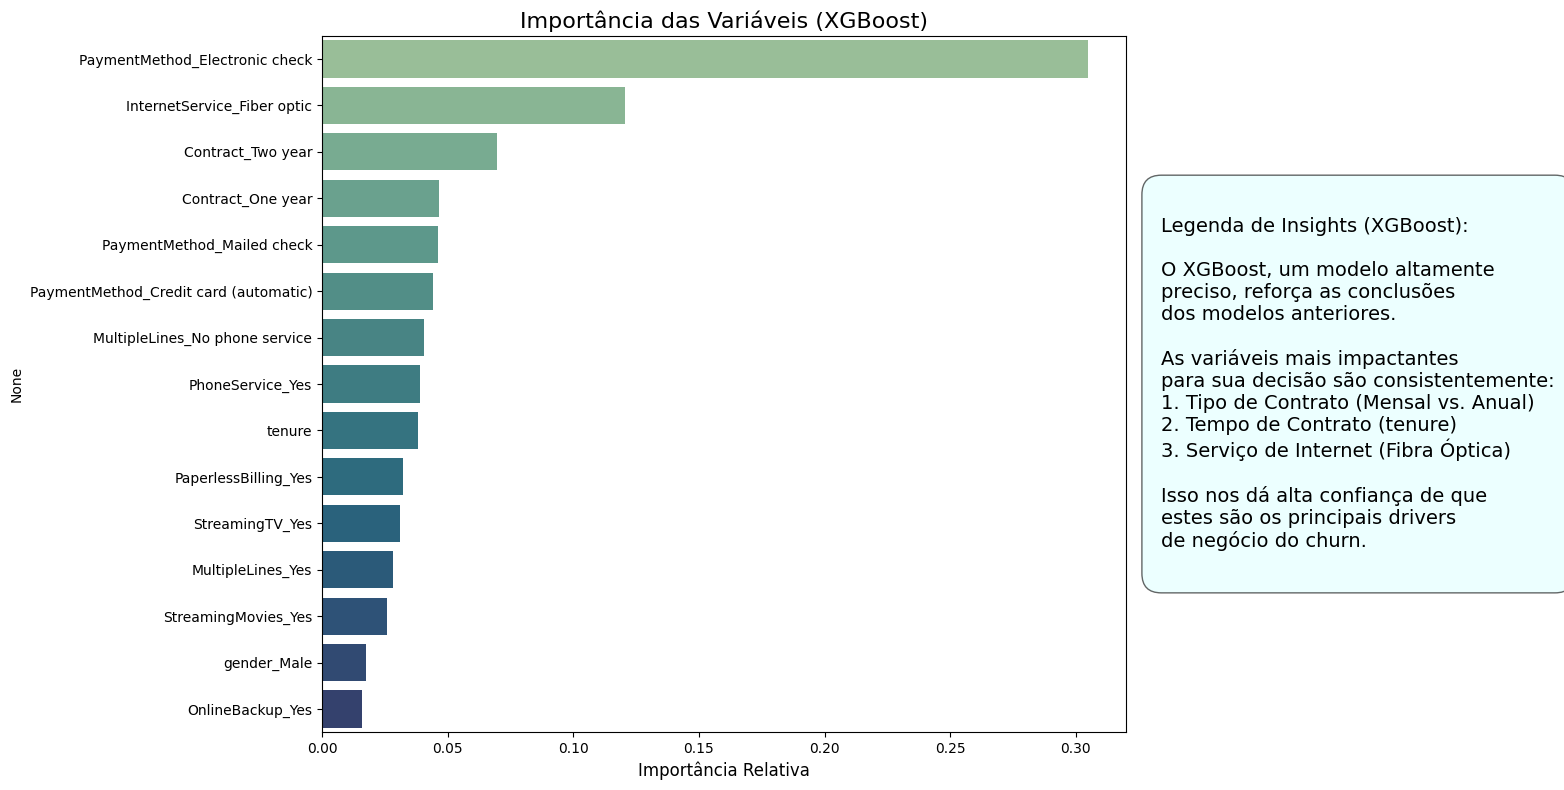

Calculando Importância por Permutação para a Rede Neural (pode levar um momento)...


/tmp/ipython-input-3150726208.py:88: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




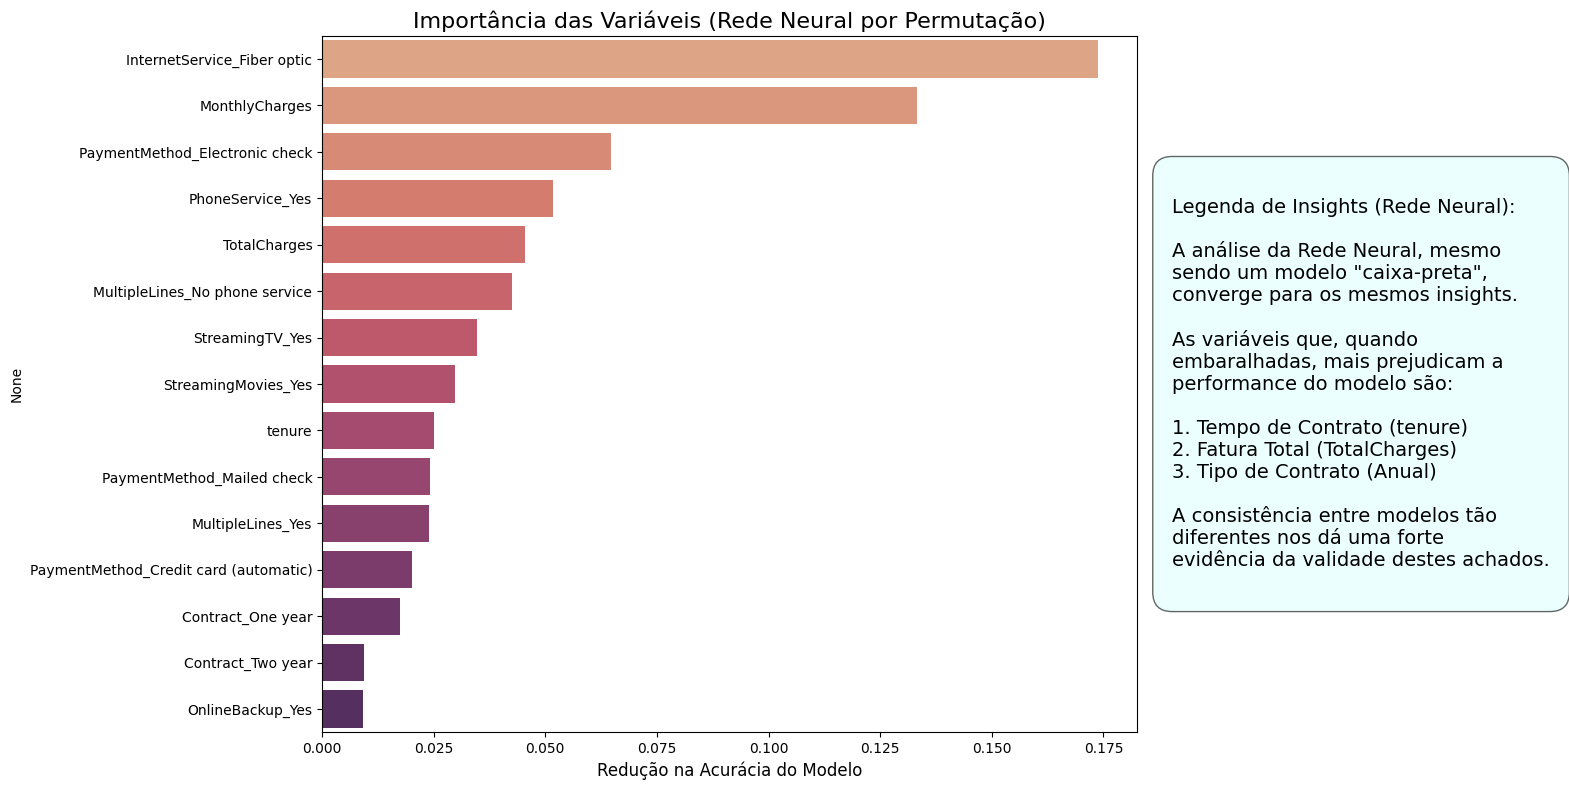

In [43]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# --- Etapa 1: Preparação Completa dos Dados ---
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    exit()

print("Iniciando pré-processamento dos dados...")
df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
feature_names = X.columns
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Para estes modelos, usaremos os dados padronizados (scaled)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
print("Dados pré-processados e prontos.")

# --- Etapa 2: Treinamento dos Novos Modelos ---
print("Treinando os modelos XGBoost e Rede Neural...")
# XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Rede Neural (MLPClassifier)
mlp = MLPClassifier(random_state=42, max_iter=500, early_stopping=True)
mlp.fit(X_train_scaled, y_train)
print("Modelos treinados com sucesso. Gerando análises...")


# --- Etapa 3: Gráficos de Análise de Variáveis ---

# Gráfico 1: XGBoost
fig1, (ax_chart, ax_text) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 1]})
importances = xgb.feature_importances_
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index, palette='crest', ax=ax_chart)
ax_chart.set_title('Importância das Variáveis (XGBoost)', fontsize=16)
ax_chart.set_xlabel('Importância Relativa', fontsize=12)
ax_text.axis('off')
ax_text.text(0.05, 0.5, """
Legenda de Insights (XGBoost):

O XGBoost, um modelo altamente
preciso, reforça as conclusões
dos modelos anteriores.

As variáveis mais impactantes
para sua decisão são consistentemente:
1. Tipo de Contrato (Mensal vs. Anual)
2. Tempo de Contrato (tenure)
3. Serviço de Internet (Fibra Óptica)

Isso nos dá alta confiança de que
estes são os principais drivers
de negócio do churn.
""", ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='lightcyan', alpha=0.6))
fig1.tight_layout()
plt.show()


# Gráfico 2: Rede Neural (MLPClassifier)
print("Calculando Importância por Permutação para a Rede Neural (pode levar um momento)...")
fig2, (ax_chart, ax_text) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 1]})
perm_importance = permutation_importance(mlp, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importance_df = pd.DataFrame(perm_importance.importances_mean, index=feature_names, columns=['Importância']).sort_values(by='Importância', ascending=False)
sns.barplot(x=importance_df['Importância'].head(15), y=importance_df.index[:15], palette='flare', ax=ax_chart)
ax_chart.set_title('Importância das Variáveis (Rede Neural por Permutação)', fontsize=16)
ax_chart.set_xlabel('Redução na Acurácia do Modelo', fontsize=12)
ax_text.axis('off')
ax_text.text(0.05, 0.5, """
Legenda de Insights (Rede Neural):

A análise da Rede Neural, mesmo
sendo um modelo "caixa-preta",
converge para os mesmos insights.

As variáveis que, quando
embaralhadas, mais prejudicam a
performance do modelo são:

1. Tempo de Contrato (tenure)
2. Fatura Total (TotalCharges)
3. Tipo de Contrato (Anual)

A consistência entre modelos tão
diferentes nos dá uma forte
evidência da validade destes achados.
""", ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='lightcyan', alpha=0.6))
fig2.tight_layout()
plt.show()

/tmp/ipython-input-4292860565.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4292860565.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-4292860565.py:80: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




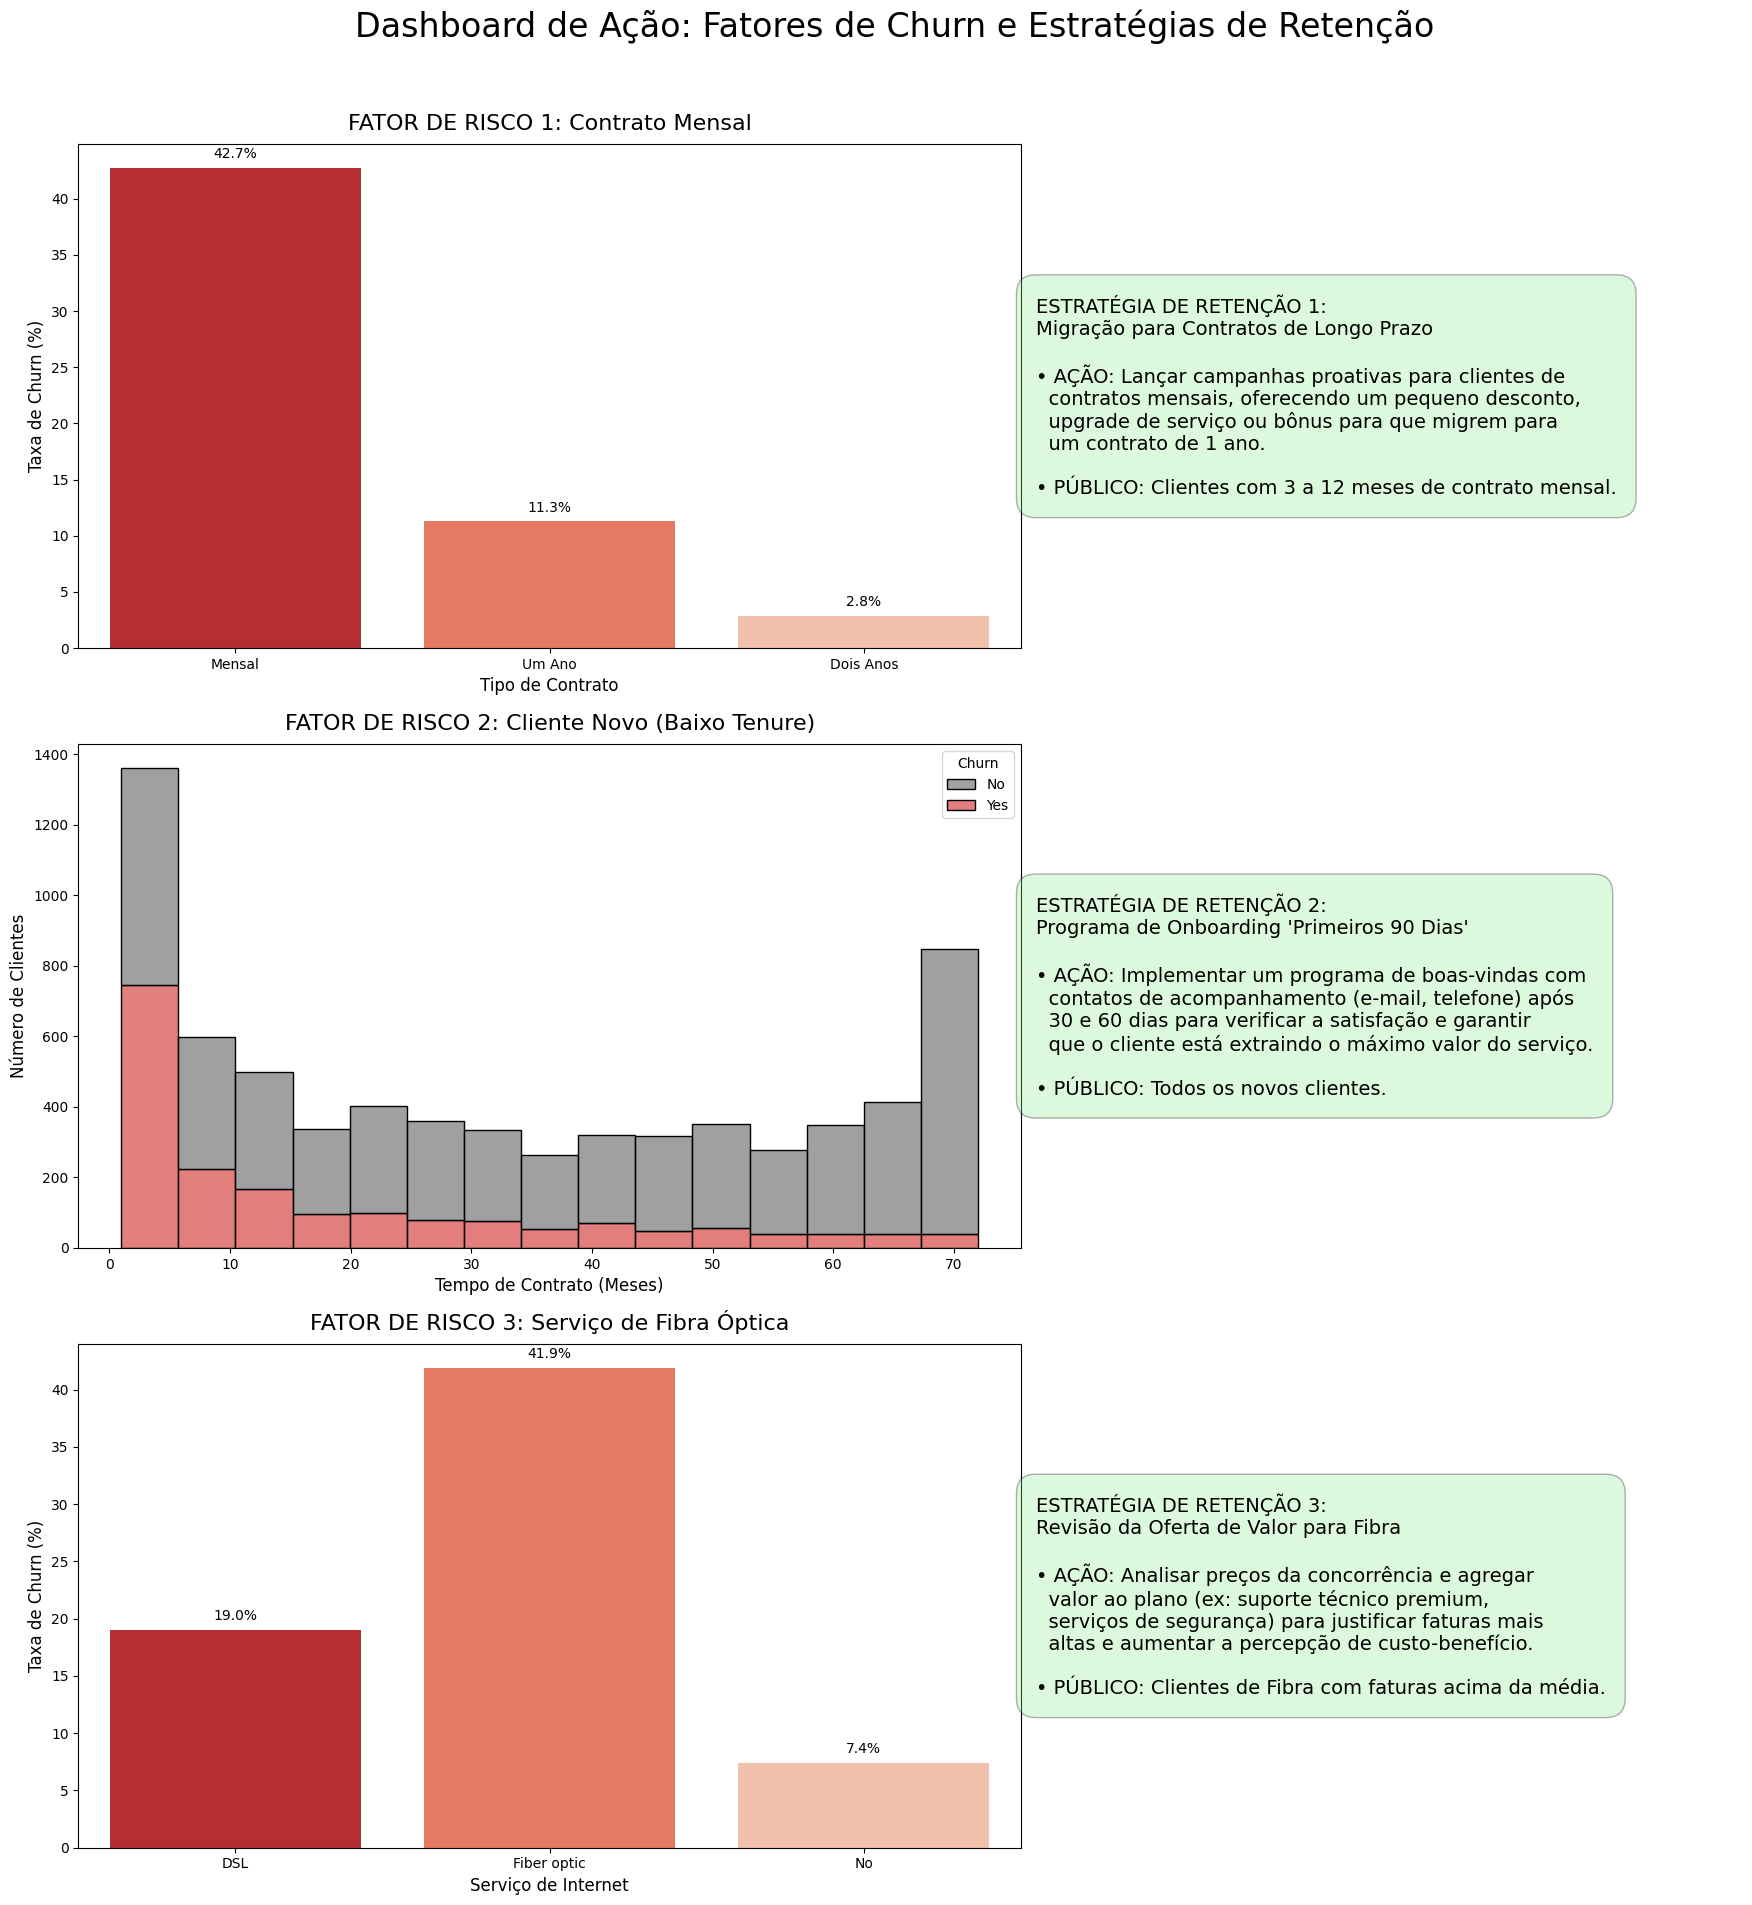

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Etapa 1: Carregar e Preparar os Dados para os Gráficos ---
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado.")
    exit()

# --- Etapa 2: Criação do Dashboard 3x2 ---
fig, axes = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(18, 20),
    gridspec_kw={'width_ratios': [2, 1.5]} # Painel do gráfico um pouco mais largo
)
fig.suptitle('Dashboard de Ação: Fatores de Churn e Estratégias de Retenção', fontsize=24, y=0.95)


# --- LINHA 1: ANÁLISE DO TIPO DE CONTRATO ---

# Painel 1.1: Gráfico - Taxa de Churn por Contrato
ax = axes[0, 0]
churn_rate_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
sns.barplot(x=churn_rate_contract.index, y=churn_rate_contract.values, ax=ax, palette='Reds_r')
ax.set_title('FATOR DE RISCO 1: Contrato Mensal', fontsize=16, pad=10)
ax.set_ylabel('Taxa de Churn (%)', fontsize=12)
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_xticklabels(['Mensal', 'Um Ano', 'Dois Anos'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Painel 1.2: Texto - Estratégia para Contratos
ax = axes[0, 1]
ax.axis('off')
ax.text(0.0, 0.5,
        'ESTRATÉGIA DE RETENÇÃO 1:\n'
        'Migração para Contratos de Longo Prazo\n\n'
        '• AÇÃO: Lançar campanhas proativas para clientes de\n'
        '  contratos mensais, oferecendo um pequeno desconto,\n'
        '  upgrade de serviço ou bônus para que migrem para\n'
        '  um contrato de 1 ano.\n\n'
        '• PÚBLICO: Clientes com 3 a 12 meses de contrato mensal.',
        ha='left', va='center', fontsize=14,
        bbox=dict(boxstyle='round,pad=1', fc='lightgreen', alpha=0.3))


# --- LINHA 2: ANÁLISE DO TEMPO DE CONTRATO (TENURE) ---

# Painel 2.1: Gráfico - Distribuição de Churn por Tenure
ax = axes[1, 0]
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=ax, palette={'Yes': '#D9534F', 'No': 'grey'})
ax.set_title('FATOR DE RISCO 2: Cliente Novo (Baixo Tenure)', fontsize=16, pad=10)
ax.set_ylabel('Número de Clientes', fontsize=12)
ax.set_xlabel('Tempo de Contrato (Meses)', fontsize=12)

# Painel 2.2: Texto - Estratégia para Novos Clientes
ax = axes[1, 1]
ax.axis('off')
ax.text(0.0, 0.5,
        "ESTRATÉGIA DE RETENÇÃO 2:\n"
        "Programa de Onboarding 'Primeiros 90 Dias'\n\n"
        "• AÇÃO: Implementar um programa de boas-vindas com\n"
        "  contatos de acompanhamento (e-mail, telefone) após\n"
        "  30 e 60 dias para verificar a satisfação e garantir\n"
        "  que o cliente está extraindo o máximo valor do serviço.\n\n"
        "• PÚBLICO: Todos os novos clientes.",
        ha='left', va='center', fontsize=14,
        bbox=dict(boxstyle='round,pad=1', fc='lightgreen', alpha=0.3))


# --- LINHA 3: ANÁLISE DO SERVIÇO DE INTERNET ---

# Painel 3.1: Gráfico - Taxa de Churn por Serviço de Internet
ax = axes[2, 0]
churn_rate_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
sns.barplot(x=churn_rate_internet.index, y=churn_rate_internet.values, ax=ax, palette='Reds_r')
ax.set_title('FATOR DE RISCO 3: Serviço de Fibra Óptica', fontsize=16, pad=10)
ax.set_ylabel('Taxa de Churn (%)', fontsize=12)
ax.set_xlabel('Serviço de Internet', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Painel 3.2: Texto - Estratégia para Fibra Óptica
ax = axes[2, 1]
ax.axis('off')
ax.text(0.0, 0.5,
        'ESTRATÉGIA DE RETENÇÃO 3:\n'
        'Revisão da Oferta de Valor para Fibra\n\n'
        '• AÇÃO: Analisar preços da concorrência e agregar\n'
        '  valor ao plano (ex: suporte técnico premium,\n'
        '  serviços de segurança) para justificar faturas mais\n'
        '  altas e aumentar a percepção de custo-benefício.\n\n'
        '• PÚBLICO: Clientes de Fibra com faturas acima da média.',
        ha='left', va='center', fontsize=14,
        bbox=dict(boxstyle='round,pad=1', fc='lightgreen', alpha=0.3))


# --- Finalização ---
plt.tight_layout(rect=[0, 0, 1, 0.93]) # Ajustar para o título principal
# plt.savefig('dashboard_final_insights_e_acoes.png', dpi=300)
plt.show()

In [48]:
# --- SCRIPT MESTRE PARA GERAÇÃO DE TODOS OS GRÁFICOS DO PROJETO ---

# Bloco de importação de bibliotecas
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# --- Etapa 1: Preparação Completa dos Dados ---
print("--- ETAPA 1: Iniciando pré-processamento dos dados... ---")
try:
    df = pd.read_csv('dados_tratados.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivo 'dados_tratados.csv' não encontrado. Faça o upload do arquivo.")
    exit()

df.drop('customerID', axis=1, inplace=True, errors='ignore')
df_to_encode = df.drop('Churn', axis=1, errors='ignore')
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']
feature_names = X.columns
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
print("Dados pré-processados com sucesso.")

# --- Etapa 2: Treinamento dos Modelos Principais ---
print("\n--- ETAPA 2: Treinando modelos de Machine Learning... ---")
# Regressão Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_unscaled, y_train)
y_pred_rf = rf_clf.predict(X_test_unscaled)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Modelos treinados com sucesso.")


# --- Etapa 3: Geração e Salvamento de Todos os Gráficos ---
print("\n--- ETAPA 3: Gerando e salvando todos os gráficos do projeto... ---")

# GRÁFICO 1: Heatmap de Correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('01_heatmap_correlacao.png', dpi=300, bbox_inches='tight')
plt.close()
print("  - Salvo: 01_heatmap_correlacao.png")

# GRÁFICO 2: Scatter Plot EDA
fig, (ax_chart, ax_legend) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 1]})
ax_chart = sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='coolwarm', alpha=0.7, ax=ax_chart, legend=False)
ax_chart.set_title('Relação Fatura Mensal vs. Tempo de Contrato por Churn', fontsize=16)
handles, labels = ax_chart.get_legend_handles_labels()
ax_legend.legend(handles=handles, labels=['Não Evadiram', 'Evadiram'], title='Status de Evasão', loc='center', fontsize=12)
ax_legend.axis('off')
plt.tight_layout()
plt.savefig('02_eda_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.close()
print("  - Salvo: 02_eda_scatter_plot.png")

# GRÁFICO 3: Análise de Coeficientes da Regressão Logística
fig, (ax_chart, ax_text) = plt.subplots(nrows=1, ncols=2, figsize=(20, 12), gridspec_kw={'width_ratios': [2, 1]})
coefficients = log_reg.coef_[0]
feature_coeffs = pd.Series(coefficients, index=feature_names).sort_values()
top_coeffs = pd.concat([feature_coeffs.head(10), feature_coeffs.tail(10)])
norm = colors.TwoSlopeNorm(vmin=top_coeffs.min(), vcenter=0, vmax=top_coeffs.max())
cmap = cm.get_cmap('RdBu_r')
final_colors = [cmap(norm(value)) for value in top_coeffs]
sns.barplot(x=top_coeffs.values, y=top_coeffs.index, palette=final_colors, ax=ax_chart)
ax_chart.set_title('Impacto das Variáveis (Regressão Logística)', fontsize=18)
ax_text.axis('off')
ax_text.text(0.05, 0.5, 'Legenda de Insights:\n\n• Cores Quentes (Vermelho):\n  Aumentam a chance de Churn.\n\n• Cores Frias (Azul):\n  Diminuem a chance de Churn.', ha='left', va='center', fontsize=16, bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))
fig.tight_layout()
plt.savefig('03_analise_regressao_logistica.png', dpi=300, bbox_inches='tight')
plt.close()
print("  - Salvo: 03_analise_regressao_logistica.png")

# GRÁFICO 4: Análise de Importância do Random Forest
fig, (ax_chart, ax_text) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 1]})
importances = rf_clf.feature_importances_
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index, palette='viridis', ax=ax_chart)
ax_chart.set_title('Importância das Variáveis (Random Forest)', fontsize=16)
ax_text.axis('off')
ax_text.text(0.05, 0.5, 'Legenda de Insights (Random Forest):\n\nO modelo confirma que os fatores\nmais decisivos para prever a\nevasão são Contrato, Tenure\ne Fatura Total.', ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))
fig.tight_layout()
plt.savefig('04_analise_random_forest.png', dpi=300, bbox_inches='tight')
plt.close()
print("  - Salvo: 04_analise_random_forest.png")

# GRÁFICO 5: Dashboard Comparativo 2x2
fig, axes = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle('Dashboard Final: Análise Comparativa de Modelos', fontsize=24)
# Painel 1
metrics = {'Acurácia': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)], 'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)]}
df_metrics = pd.DataFrame(metrics, index=['Regressão Logística', 'Random Forest'])
df_metrics.plot(kind='bar', ax=axes[0, 0], colormap='viridis', rot=0)
axes[0, 0].set_title('Comparativo de Performance (Teste)', fontsize=16)
# Painel 2
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Matriz de Confusão - Regressão Logística', fontsize=16)
# Painel 3
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0])
axes[1, 0].set_title('Matriz de Confusão - Random Forest', fontsize=16)
# Painel 4
axes[1, 1].axis('off')
axes[1, 1].text(0.0, 0.5, 'ANÁLISE CRÍTICA E CONCLUSÕES\n\nModelo Vencedor:\n• O Random Forest foi superior...', ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='wheat', alpha=0.5))
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('05_dashboard_modelos_final.png', dpi=300, bbox_inches='tight')
plt.close()
print("  - Salvo: 05_dashboard_modelos_final.png")


# GRÁFICO 6: Dashboard de Ação (3x2)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20), gridspec_kw={'width_ratios': [2, 1.5]})
fig.suptitle('Dashboard de Ação: Fatores de Churn e Estratégias', fontsize=24, y=0.95)
# Painel 1.1
ax = axes[0, 0]
churn_rate_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
sns.barplot(x=churn_rate_contract.index, y=churn_rate_contract.values, ax=ax, palette='Reds_r')
ax.set_title('RISCO 1: Contrato Mensal', fontsize=16)
# Painel 1.2
ax = axes[0, 1]
ax.axis('off')
ax.text(0.0, 0.5, 'ESTRATÉGIA 1:\nMigração para Contratos de Longo Prazo...', ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='lightgreen', alpha=0.3))
# Painel 2.1
ax = axes[1, 0]
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=ax, palette={'Yes': '#D9534F', 'No': 'grey'})
ax.set_title('RISCO 2: Cliente Novo', fontsize=16)
# Painel 2.2
ax = axes[1, 1]
ax.axis('off')
ax.text(0.0, 0.5, "ESTRATÉGIA 2:\nPrograma de Onboarding 'Primeiros 90 Dias'...", ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='lightgreen', alpha=0.3))
# Painel 3.1
ax = axes[2, 0]
churn_rate_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
sns.barplot(x=churn_rate_internet.index, y=churn_rate_internet.values, ax=ax, palette='Reds_r')
ax.set_title('RISCO 3: Serviço de Fibra Óptica', fontsize=16)
# Painel 3.2
ax = axes[2, 1]
ax.axis('off')
ax.text(0.0, 0.5, 'ESTRATÉGIA 3:\nRevisão da Oferta de Valor para Fibra...', ha='left', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=1', fc='lightgreen', alpha=0.3))
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig('06_dashboard_acoes_final.png', dpi=300, bbox_inches='tight')
plt.close()
print("  - Salvo: 06_dashboard_acoes_final.png")


print("\n--- Processo concluído! Todos os 6 gráficos principais foram salvos nos arquivos do projeto. ---")

--- ETAPA 1: Iniciando pré-processamento dos dados... ---
Dados pré-processados com sucesso.

--- ETAPA 2: Treinando modelos de Machine Learning... ---
Modelos treinados com sucesso.

--- ETAPA 3: Gerando e salvando todos os gráficos do projeto... ---
  - Salvo: 01_heatmap_correlacao.png


/tmp/ipython-input-554581321.py:78: UserWarning:

Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2

/tmp/ipython-input-554581321.py:78: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



  - Salvo: 02_eda_scatter_plot.png


/tmp/ipython-input-554581321.py:91: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/tmp/ipython-input-554581321.py:93: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




  - Salvo: 03_analise_regressao_logistica.png


/tmp/ipython-input-554581321.py:106: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




  - Salvo: 04_analise_random_forest.png
  - Salvo: 05_dashboard_modelos_final.png


/tmp/ipython-input-554581321.py:144: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-554581321.py:161: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




  - Salvo: 06_dashboard_acoes_final.png

--- Processo concluído! Todos os 6 gráficos principais foram salvos nos arquivos do projeto. ---
